## Overview about Diabetes

Diabetes is a chronic medical condition characterized by elevated levels of blood glucose (sugar). It occurs when the body either cannot produce enough insulin (a hormone that regulates blood sugar) or cannot effectively use the insulin it produces. There are three main types of diabetes:

**Type 1 Diabetes:** Typically diagnosed in childhood or early adulthood, it results from the immune system mistakenly attacking and destroying insulin-producing cells in the pancreas. People with Type 1 diabetes require lifelong insulin therapy.

**Type 2 Diabetes:** More common in adults, but increasingly seen in children and adolescents, Type 2 diabetes is often linked to lifestyle factors such as poor diet, sedentary behavior, and obesity. It is characterized by insulin resistance, where the body's cells do not respond effectively to insulin, and the pancreas may not produce enough insulin to compensate.

## About the dataset


### Context

This dataset is originally from the **National Institute of Diabetes and Digestive and Kidney Diseases**. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database.

Diabetes-> 1

Non-Diabetes-> 0


### Content

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

## Setting up the environment

In [1]:
import numpy as np # for linear algebra
import pandas as pd # data processing, CSV file I/O, etc
import seaborn as sns # for plots
import plotly.graph_objects as go # for plots
import plotly.express as px #for plots
import matplotlib.pyplot as plt # for visualizations and plots
import missingno as msno # for plotting missing data
from scipy.io import arff


from sklearn.model_selection import train_test_split # spliting training and testing data
from sklearn.preprocessing import MinMaxScaler # data normalization with sklearn
from sklearn.preprocessing import StandardScaler # data standardization with  sklearn
from sklearn.metrics import classification_report, confusion_matrix # to evaluate the model
from mlxtend.plotting import plot_confusion_matrix # plot confusion matrix
from sklearn.model_selection import GridSearchCV # to finetune the model
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score, classification_report

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer

import imblearn
import copy
import sklearn
from sklearn.inspection import permutation_importance
from sklearn.impute import KNNImputer
import lightgbm as lgb

seed=42

## Read the dataset

In [2]:
df = pd.read_csv('diabetes.csv')
df.sample(10) #print random 10 rows

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
664            6      115             60             39        0  33.7   
198            4      109             64             44       99  34.8   
733            2      106             56             27      165  29.0   
0              6      148             72             35        0  33.6   
530            2      122             60             18      106  29.8   
445            0      180             78             63       14  59.4   
736            0      126             86             27      120  27.4   
555            7      124             70             33      215  25.5   
252            2       90             80             14       55  24.4   
578           10      133             68              0        0  27.0   

     DiabetesPedigreeFunction  Age  Outcome  
664                     0.245   40        1  
198                     0.905   26        1  
733                     0.426   22        0  
0                       0.627   50        1  
530                     0.717   22        0  
445                     2.420   25        1  
736                     0.515   21        0  
555                     0.161   37        0  
252                     0.249   24        0  
578                     0.245   36        0

In [3]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

## Getting info about the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

In [6]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

This Dataset have 768 rows and 9 columns.
In this dataset doesn't have any null values!!

In the above stats we can see that there are people with 0 BP (dead person?), 0 skin thickness (skeleton?) and 0 Glucose (how do you even survive?).

Let's convert those 0s to NaN.

In [8]:
df["Glucose"] = df["Glucose"].apply(lambda x: np.nan if x == 0 else x)
df["BloodPressure"] = df["BloodPressure"].apply(lambda x: np.nan if x == 0 else x)
df["SkinThickness"] = df["SkinThickness"].apply(lambda x: np.nan if x == 0 else x)
df["Insulin"] = df["Insulin"].apply(lambda x: np.nan if x == 0 else x)
df["BMI"] = df["BMI"].apply(lambda x: np.nan if x == 0 else x)

In [9]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0      NaN  33.6   
1              1     85.0           66.0           29.0      NaN  26.6   
2              8    183.0           64.0            NaN      NaN  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
5              5    116.0           74.0            NaN      NaN  25.6   
6              3     78.0           50.0           32.0     88.0  31.0   
7             10    115.0            NaN            NaN      NaN  35.3   
8              2    197.0           70.0           45.0    543.0  30.5   
9              8    125.0           96.0            NaN      NaN   NaN   
10             4    110.0           92.0            NaN      NaN  37.6   
11            10    168.0           74.0            NaN      NaN  38.0   
12            10    139.0           80.0            NaN      NaN  27.1   
13             1    189.0           60.0           23.0    846.0  30.1   
14             5    166.0           72.0           19.0    175.0  25.8   
15             7    100.0            NaN            NaN      NaN  30.0   
16             0    118.0           84.0           47.0    230.0  45.8   
17             7    107.0           74.0            NaN      NaN  29.6   
18             1    103.0           30.0           38.0     83.0  43.3   
19             1    115.0           70.0           30.0     96.0  34.6   
20             3    126.0           88.0           41.0    235.0  39.3   
21             8     99.0           84.0            NaN      NaN  35.4   
22             7    196.0           90.0            NaN      NaN  39.8   
23             9    119.0           80.0           35.0      NaN  29.0   
24            11    143.0           94.0           33.0    146.0  36.6   
25            10    125.0           70.0           26.0    115.0  31.1   
26             7    147.0           76.0            NaN      NaN  39.4   
27             1     97.0           66.0           15.0    140.0  23.2   
28            13    145.0           82.0           19.0    110.0  22.2   
29             5    117.0           92.0            NaN      NaN  34.1   
30             5    109.0           75.0           26.0      NaN  36.0   
31             3    158.0           76.0           36.0    245.0  31.6   
32             3     88.0           58.0           11.0     54.0  24.8   
33             6     92.0           92.0            NaN      NaN  19.9   
34            10    122.0           78.0           31.0      NaN  27.6   
35             4    103.0           60.0           33.0    192.0  24.0   
36            11    138.0           76.0            NaN      NaN  33.2   
37             9    102.0           76.0           37.0      NaN  32.9   
38             2     90.0           68.0           42.0      NaN  38.2   
39             4    111.0           72.0           47.0    207.0  37.1   
40             3    180.0           64.0           25.0     70.0  34.0   
41             7    133.0           84.0            NaN      NaN  40.2   
42             7    106.0           92.0           18.0      NaN  22.7   
43             9    171.0          110.0           24.0    240.0  45.4   
44             7    159.0           64.0            NaN      NaN  27.4   
45             0    180.0           66.0           39.0      NaN  42.0   
46             1    146.0           56.0            NaN      NaN  29.7   
47             2     71.0           70.0           27.0      NaN  28.0   
48             7    103.0           66.0           32.0      NaN  39.1   
49             7    105.0            NaN            NaN      NaN   NaN   
50             1    103.0           80.0           11.0     82.0  19.4   
51             1    101.0           50.0           15.0     36.0  24.2   
52             5     88.0           66.0           21.0     23.0  24.4   
53       

In [10]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [11]:
df.isnull().mean()*100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

After convert those 0s to NaN.
we see that 

Glucose column have 0.65% , 

BloodPressure column have 4.55% , 

SkinThickness column have 29.55% ,

Insulin column have 48.69% , 

BMI column have 1.43% **Null values.**

### Today, our target is to explore the importance of data cleaning in a dataset.

Data cleaning is a critical step in the data preparation process for various data analysis and machine learning tasks. It involves identifying and rectifying errors, inconsistencies, and inaccuracies in a dataset to ensure that the data is reliable, accurate, and suitable for analysis.

The importance of data cleaning cannot be overstated because the quality of your data directly impacts the quality of insights and decisions derived from it. Dirty or unclean data can lead to inaccurate analysis, biased results, and unreliable predictions. Therefore, investing time and effort in data cleaning is a crucial step in the data analysis pipeline to ensure that the data accurately represents the real-world phenomena it aims to capture.

### Today, we will explore various types of data cleaning methods to determine which one is best suited for our model.


#### Types of Data Cleaning

##### 1. Remove them.
##### 2. Impute them.
        1. Univariate.
            1. Mean
            2. Median
          
        2. Multivariate.
            1. KNN imputer
            2. Iterative imputer
        
Here are some data cleaning techniques to clean a dataset.

After completing the data cleaning process, we train our model using three algorithms: **Logistic Regression, Random Forest Classifier, and K Neighbors Classifier.**

#### Logistic Regression: 
Logistic Regression is a statistical method for binary classification, predicting whether an input belongs to one of two categories (0 or 1) using a sigmoid-shaped curve to model the probability of class membership. It assumes a linear relationship between input features and the log-odds of an event, and it's widely used for simple classification tasks due to its simplicity and interpretability.

#### Random Forest Classifier
Random Forest Classifier is an ensemble machine learning algorithm used for classification tasks. It builds multiple decision trees during training and combines their predictions to improve accuracy and reduce overfitting. It's robust, handles complex data, and is suitable for both small and large datasets.

#### K Neighbors Classifier
The K Neighbors Classifier is a supervised machine learning algorithm used for classification tasks. It classifies data points based on the majority class among their K nearest neighbors in feature space. It's a simple and intuitive method but may be sensitive to the choice of K.

## EDA on Diabetes Dataset

## Univariate Analysis

### EDA on Outcome

- Here we can see 65.1% of the people in this dataset doesn't have Diabetes and 34.9% does Diabetes.
- Here out of 768 people 500 people doesn't have Diabetes and 268 people have Diabetes.
- No Missing value is present.
- Outcome colomn have strong corelation with Glucose column near about 0.49

In [12]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot: ylabel='Outcome'>

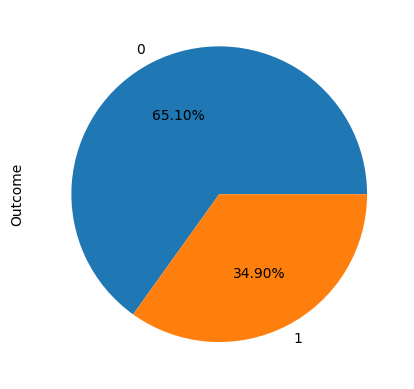

In [13]:
df['Outcome'].value_counts().plot(kind='pie', autopct='%.2f%%')

<AxesSubplot: xlabel='Outcome', ylabel='count'>

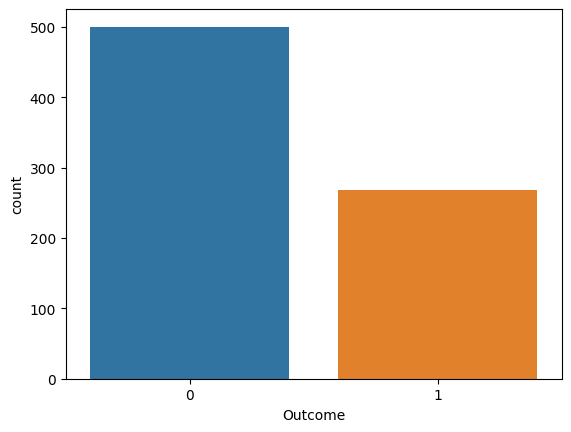

In [14]:
sns.countplot(data=df, x='Outcome')

In [15]:
df.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.494650
BloodPressure               0.170589
SkinThickness               0.259491
Insulin                     0.303454
BMI                         0.313680
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [16]:
df['Outcome'].isnull().sum()

0

### EDA on Pregnancies

- No Missing value is present.
- mean       3.845052
- std        3.369578
- This column is rigth skew near about 0.9
- This column have some outliers for above 13 value.

**Solve**
- Remove outliers.
- make data symetrick

In [17]:
df['Pregnancies'].isnull().sum()

0

In [18]:
df['Pregnancies'].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

In [19]:
df['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

C:\Users\mamit\AppData\Local\Temp\ipykernel_11980\2719533762.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Pregnancies'])


<AxesSubplot: xlabel='Pregnancies', ylabel='Density'>

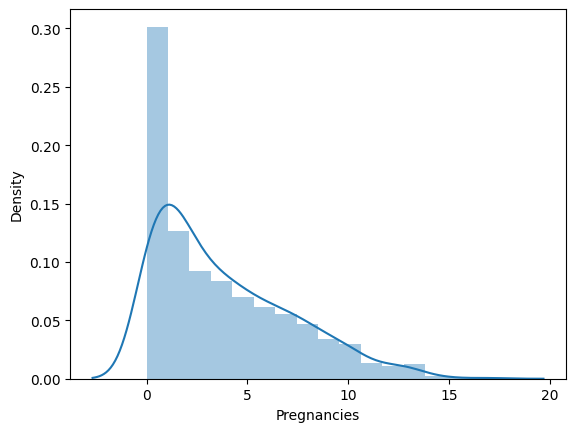

In [20]:
sns.distplot(df['Pregnancies'])

In [21]:
df['Pregnancies'].skew()

0.9016739791518588

<AxesSubplot: >

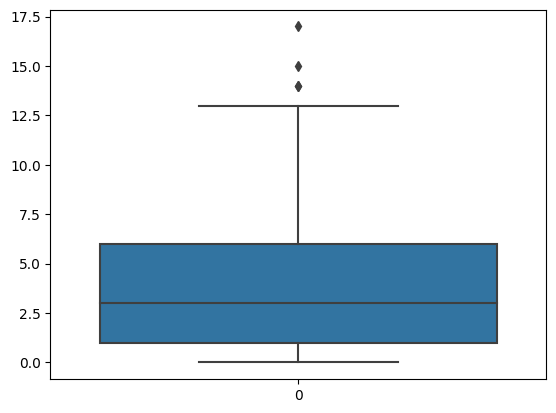

In [22]:
sns.boxplot(df['Pregnancies'])

### EDA on Glucose

- 0.65% missing value is present in this column.
- mean     121.686763
- std       30.535641
- This column is little more skew near about 0.53
- No outliers is present in this column.

**Solve**
- Remove missing value.

In [23]:
df['Glucose'].isnull().mean()*100

0.6510416666666667

In [24]:
df['Glucose'].describe()

count    763.000000
mean     121.686763
std       30.535641
min       44.000000
25%       99.000000
50%      117.000000
75%      141.000000
max      199.000000
Name: Glucose, dtype: float64

C:\Users\mamit\AppData\Local\Temp\ipykernel_11980\2512680699.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Glucose'])


<AxesSubplot: xlabel='Glucose', ylabel='Density'>

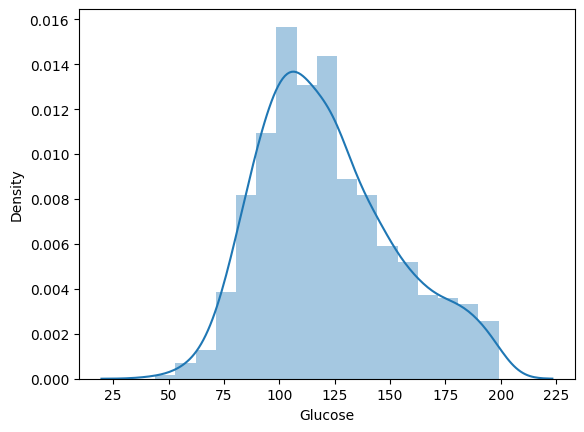

In [25]:
sns.distplot(df['Glucose'])

In [26]:
df['Glucose'].skew()

0.5309885349396285

<AxesSubplot: >

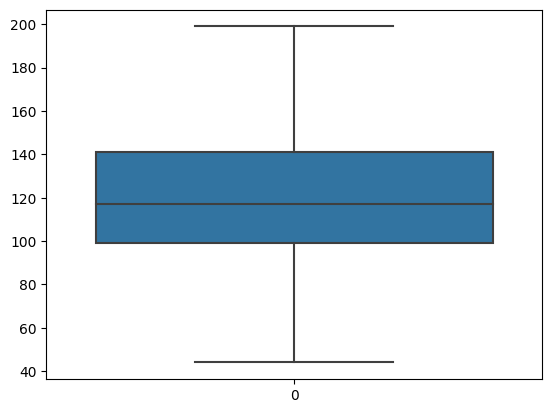

In [27]:
sns.boxplot(df['Glucose'])

### EDA on BloodPressure

- 4.55% missing value is present.
- mean      72.405184
- std       12.382158
- This is very low skew near about 0.13
- This column has outliers on below 40 and above 105 values.

**Solve**
- Remove Missing values.
- Remove outliers.

In [28]:
df['BloodPressure'].isnull().mean()*100

4.557291666666666

In [29]:
df['BloodPressure'].describe()

count    733.000000
mean      72.405184
std       12.382158
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

C:\Users\mamit\AppData\Local\Temp\ipykernel_11980\52905997.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BloodPressure'])


<AxesSubplot: xlabel='BloodPressure', ylabel='Density'>

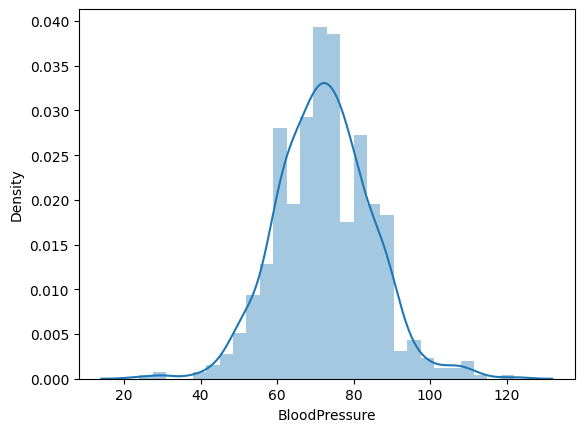

In [30]:
sns.distplot(df['BloodPressure'])

In [31]:
df['BloodPressure'].skew()

0.13415273171959252

<AxesSubplot: >

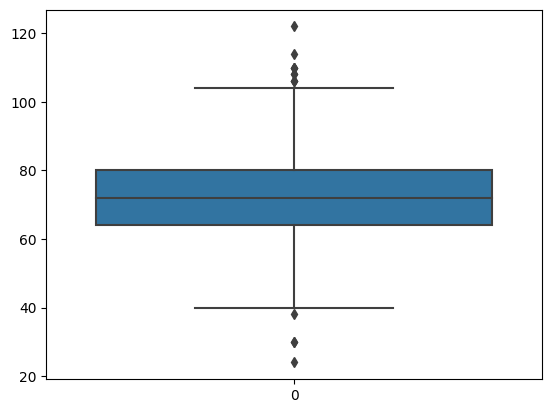

In [32]:
sns.boxplot(df['BloodPressure'])

### EDA on SkinThickness

- lots of missing value is present 29.5%
- mean      29.153420
- std       10.476982
- This columns is little more right skew near about 0.69
- little more outliers present for above 60 value

**Solve**
- Remove missing value
- Remove outliers
- correct the data distribution 

In [33]:
df['SkinThickness'].isnull().mean()*100

29.557291666666668

In [34]:
df['SkinThickness'].describe()

count    541.000000
mean      29.153420
std       10.476982
min        7.000000
25%       22.000000
50%       29.000000
75%       36.000000
max       99.000000
Name: SkinThickness, dtype: float64

C:\Users\mamit\AppData\Local\Temp\ipykernel_11980\1244122692.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SkinThickness'])


<AxesSubplot: xlabel='SkinThickness', ylabel='Density'>

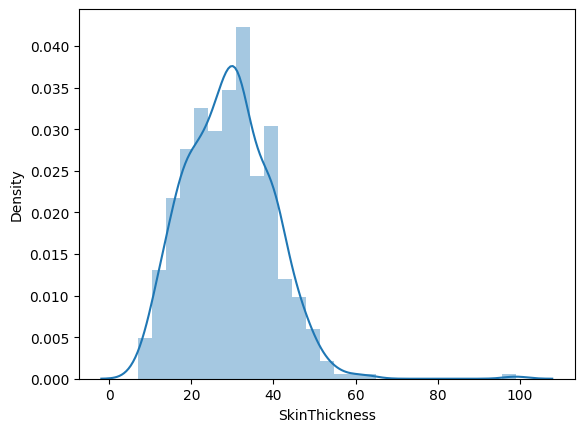

In [35]:
sns.distplot(df['SkinThickness'])

In [36]:
df['SkinThickness'].skew()

0.690619013984192

<AxesSubplot: >

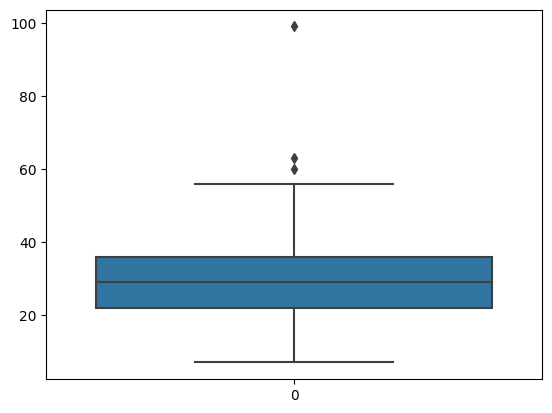

In [37]:
sns.boxplot(df['SkinThickness'])

### EDA on Insulin

- So many missing value is present there near about 50%
- mean     155.548223
- std      118.775855
- This column is very right skew near about 2.16
- So many outliers is present for more than 375 value

**Solve**
- Remove this column for the Dataset

In [38]:
df['Insulin'].isnull().mean()*100

48.69791666666667

In [39]:
df['Insulin'].describe()

count    394.000000
mean     155.548223
std      118.775855
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      846.000000
Name: Insulin, dtype: float64

C:\Users\mamit\AppData\Local\Temp\ipykernel_11980\1526206684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Insulin'])


<AxesSubplot: xlabel='Insulin', ylabel='Density'>

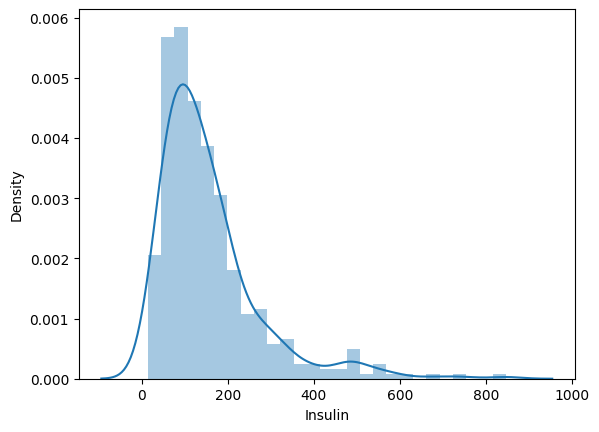

In [40]:
sns.distplot(df['Insulin'])

In [41]:
df['Insulin'].skew()

2.166463843812443

<AxesSubplot: >

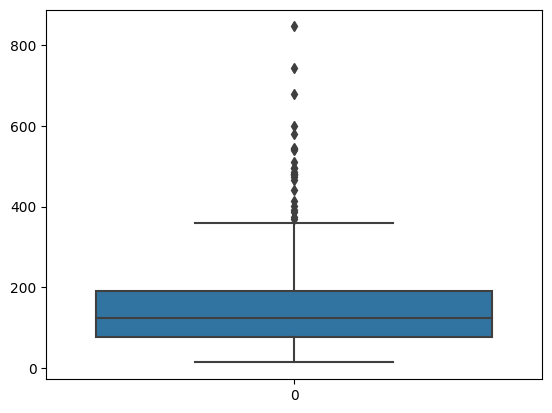

In [42]:
sns.boxplot(df['Insulin'])

### EDA on BMI

- 1.43% missing value is present
- mean      32.457464
- std        6.924988
- This column is little more right skew near about 0.59
- Here some outliers is present for above 50 value

In [43]:
df['BMI'].isnull().mean()*100

1.4322916666666665

In [44]:
df['BMI'].describe()

count    757.000000
mean      32.457464
std        6.924988
min       18.200000
25%       27.500000
50%       32.300000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

C:\Users\mamit\AppData\Local\Temp\ipykernel_11980\4107119561.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BMI'])


<AxesSubplot: xlabel='BMI', ylabel='Density'>

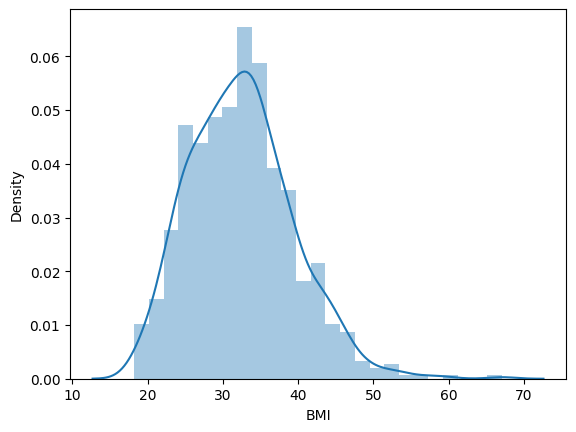

In [45]:
sns.distplot(df['BMI'])

In [46]:
df['BMI'].skew()

0.5939697505712673

<AxesSubplot: >

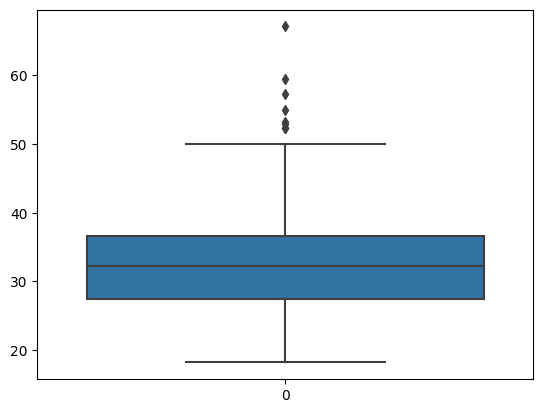

In [47]:
sns.boxplot(df['BMI'])

### EDA on DiabetesPedigreeFunction

- No missing value present.
- mean       0.471876
- std        0.331329
- This column is very right skew near about 1.91
- Many outliers is present on above 1.2 value

**Solve**
- Correct the distribution
- Remove the outliers

In [48]:
df['DiabetesPedigreeFunction'].isnull().mean()*100

0.0

In [49]:
df['DiabetesPedigreeFunction'].describe()

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

C:\Users\mamit\AppData\Local\Temp\ipykernel_11980\2428625138.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DiabetesPedigreeFunction'])


<AxesSubplot: xlabel='DiabetesPedigreeFunction', ylabel='Density'>

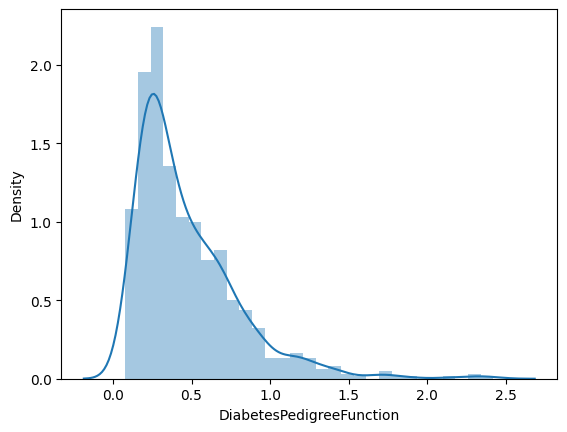

In [50]:
sns.distplot(df['DiabetesPedigreeFunction'])

In [51]:
df['DiabetesPedigreeFunction'].skew()

1.919911066307204

<AxesSubplot: >

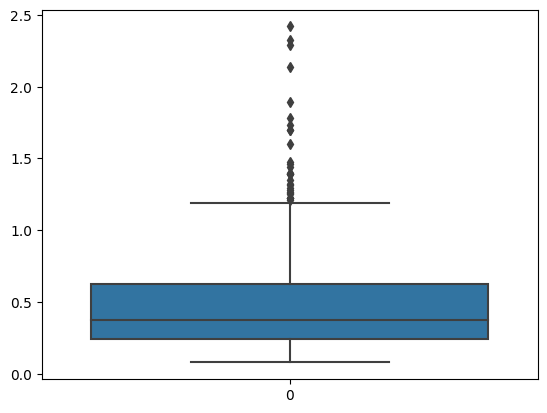

In [52]:
sns.boxplot(df['DiabetesPedigreeFunction'])

### EDA on Age

- No missing value is present.
- mean      33.240885
- std       11.760232
- This column is very right skew near about 1.12
- Some outliers is present on above 67 value

**Solve**
- Remove outliers.
- Correct the distribution.

In [53]:
df['Age'].isnull().mean()*100

0.0

In [54]:
df['Age'].describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

C:\Users\mamit\AppData\Local\Temp\ipykernel_11980\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<AxesSubplot: xlabel='Age', ylabel='Density'>

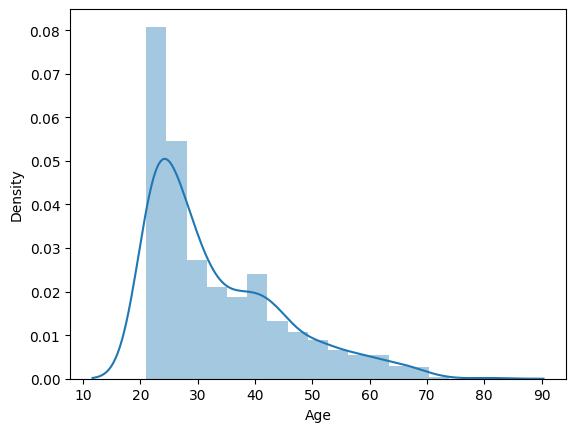

In [55]:
sns.distplot(df['Age'])

In [56]:
df['Age'].skew()

1.1295967011444805

<AxesSubplot: >

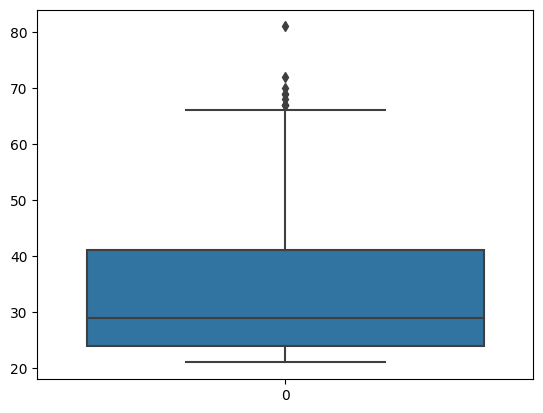

In [57]:
sns.boxplot(df['Age'])

## Multivariate Analysis

**Pregnencies vs Outcome**

<AxesSubplot: xlabel='Pregnancies', ylabel='count'>

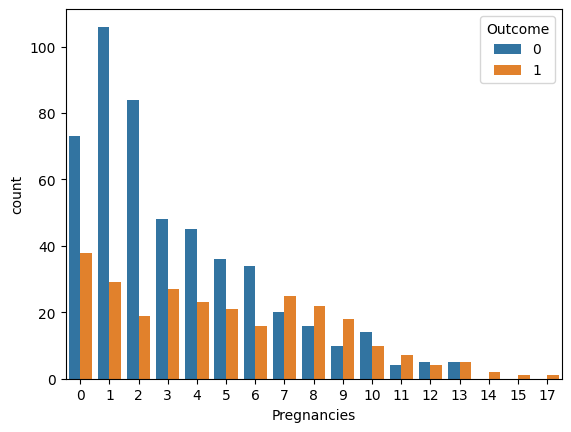

In [58]:
sns.countplot(x='Pregnancies', hue='Outcome', data=df)

<AxesSubplot: xlabel='Pregnancies', ylabel='Count'>

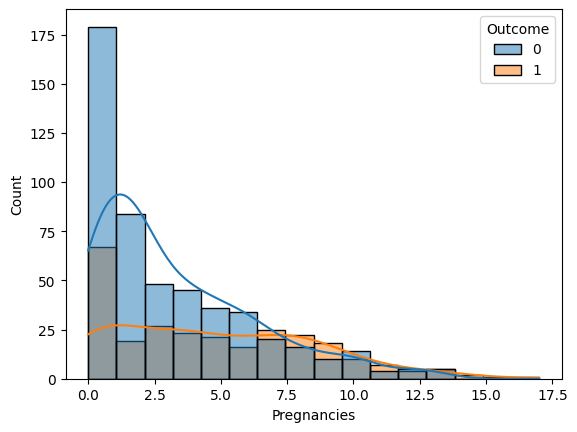

In [59]:
sns.histplot(x='Pregnancies', hue='Outcome', data=df, kde=True)

**Outcome vs Glucose**

<AxesSubplot: xlabel='Glucose', ylabel='Count'>

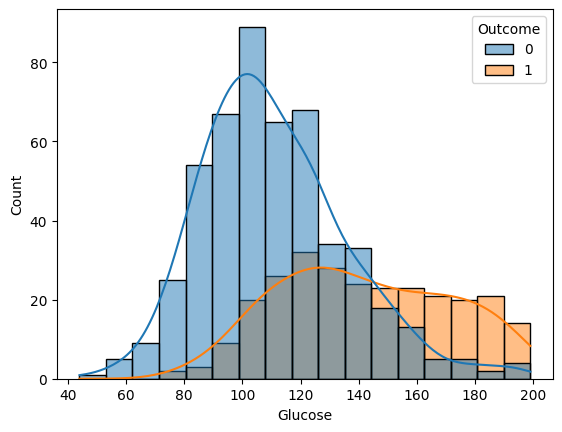

In [60]:
sns.histplot(x='Glucose', hue='Outcome', data=df, kde=True)

**BloodPressure vs Outcome**

<AxesSubplot: xlabel='BloodPressure', ylabel='Count'>

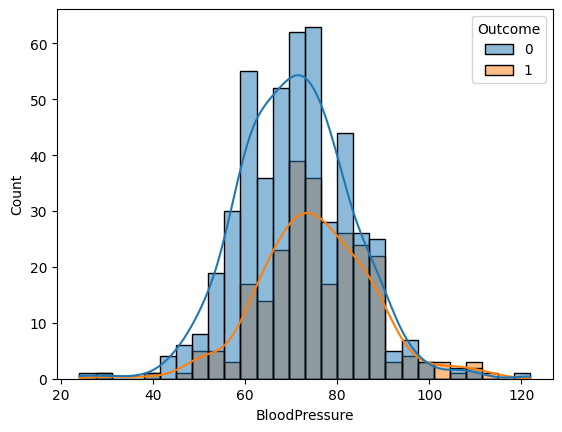

In [61]:
sns.histplot(x='BloodPressure', hue='Outcome', data=df, kde=True)

**SkinThickness vs Outcome**

<AxesSubplot: xlabel='SkinThickness', ylabel='Count'>

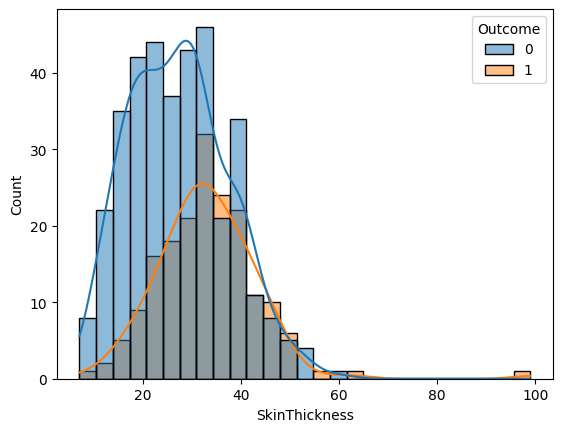

In [62]:
sns.histplot(x='SkinThickness', hue='Outcome', data=df, kde=True)

**Insulin vs Outcome**

<AxesSubplot: xlabel='Insulin', ylabel='Count'>

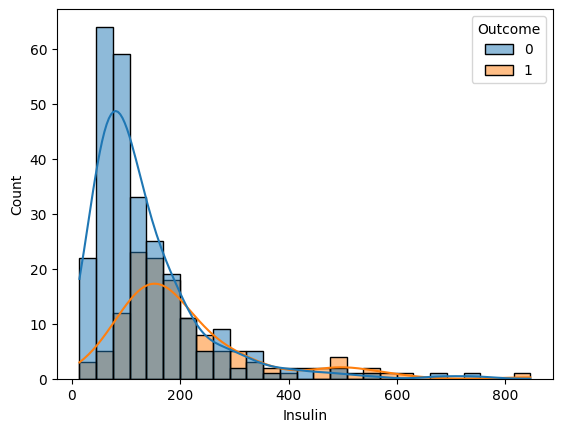

In [63]:
sns.histplot(x='Insulin', hue='Outcome', data=df, kde=True)

**BMI vs Outcome**

<AxesSubplot: xlabel='BMI', ylabel='Count'>

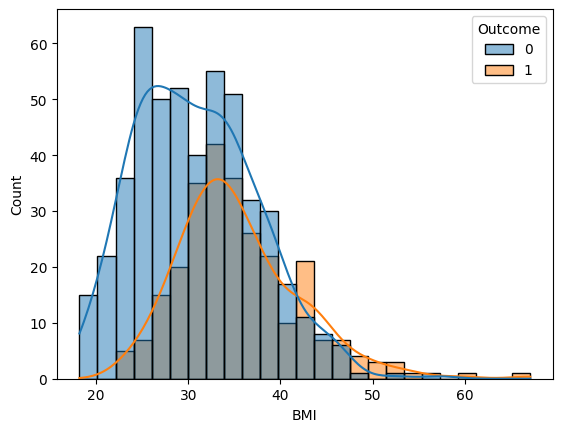

In [64]:
sns.histplot(x='BMI', hue='Outcome', data=df, kde=True)

**DiabetesPedigreeFunction vs Outcome**

<AxesSubplot: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

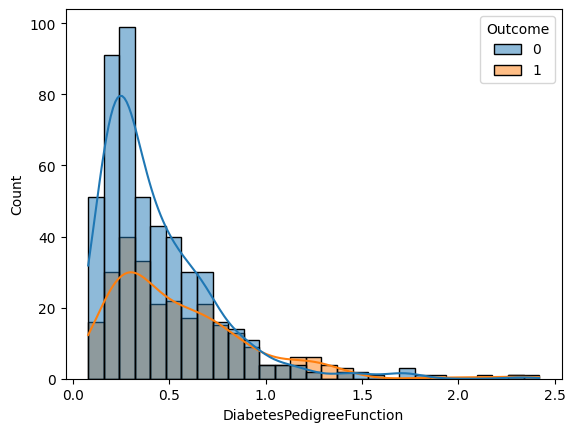

In [65]:
sns.histplot(x='DiabetesPedigreeFunction', hue='Outcome', data=df, kde=True)

**Age vs Outcome**

<AxesSubplot: xlabel='Age', ylabel='Count'>

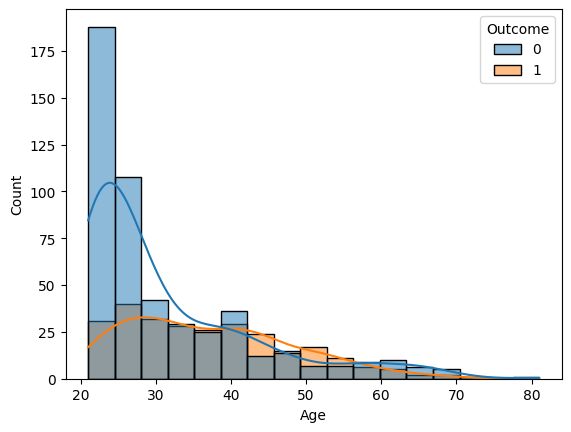

In [66]:
sns.histplot(x='Age', hue='Outcome', data=df, kde=True)

In [67]:
df_copy = df.copy()

In [68]:
df_copy.fillna(0, inplace=True)

In [69]:
df_copy.isnull().sum().sum()

0

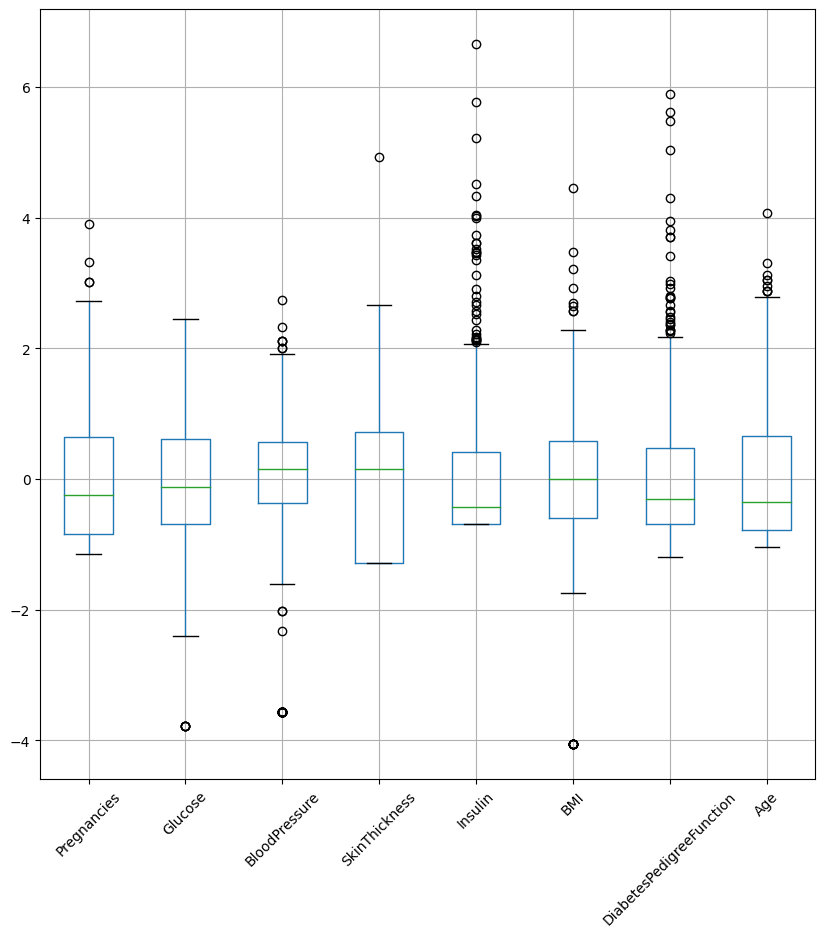

In [70]:
# Boxplots for feature distributions
df_X = df_copy.drop(columns=['Outcome'])
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
df_scale_X = pd.DataFrame(sklearn.preprocessing.scale(df_X), columns=df_X.columns)
df_scale_X.boxplot(ax=ax, rot=45)
plt.show()

In [71]:
def plot_sample(non_diabetic,diabetic):
    index = np.random.randint(0, len(df)/2, 2)
    
    fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10, 4))
    ax[0].plot(non_diabetic.iloc[index[0], :].values, label=f"Case {index[0]}")
    ax[0].plot(non_diabetic.iloc[index[1], :].values, label=f"Case {index[1]}")
    ax[0].legend(shadow=True, frameon=True, facecolor="inherit", loc=1, fontsize=9)
    ax[0].set_title("Non-Diabetic")
    
    ax[1].plot(diabetic.iloc[index[0], :].values, label=f"Case {index[0]}")
    ax[1].plot(diabetic.iloc[index[1], :].values, label=f"Case {index[1]}")
    ax[1].legend(shadow=True, frameon=True, facecolor="inherit", loc=1, fontsize=9)
    ax[1].set_title("Diabetic")
    
    
    plt.tight_layout()
    plt.show()

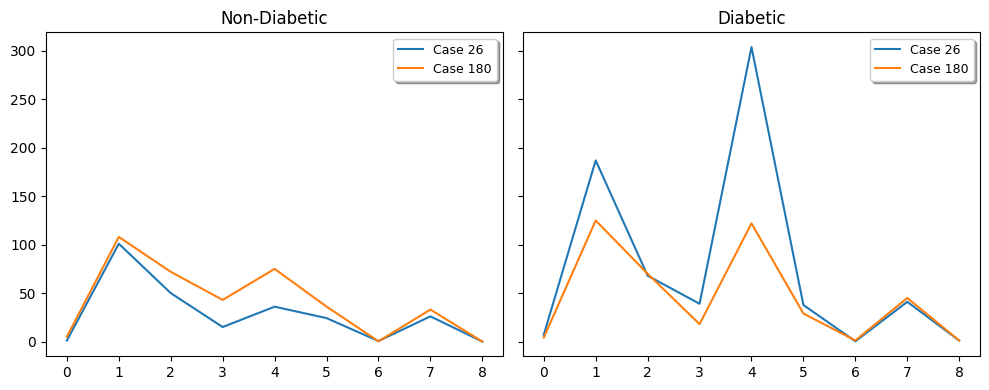

In [72]:
groupby_df = df_copy.groupby("Outcome")
non_diabetic = groupby_df.get_group(0)
diabetic = groupby_df.get_group(1)

plot_sample(non_diabetic, diabetic)

## Smoothed Mean Plot for Class Comparison

In this Python code, a function called `plot_smoothed_mean` is defined for creating smoothed mean plots. It takes input data, a class name, and a step size as parameters. The function calculates the rolling mean and standard deviation of the data with the specified step size, then plots the smoothed mean along with a shaded area representing the margin of three times the standard deviation.

The code also demonstrates the use of this function to compare the smoothed means of different classes. It creates a subplot with two panels, each representing a different class. The data for each class is grouped, and the mean is computed before passing it to the `plot_smoothed_mean` function. This allows for visualizing how the smoothed means of different classes compare.

The resulting plot provides insights into how the means of different classes vary over time or some other variable represented by the data, with shaded areas indicating the uncertainty around the mean estimates.


In [73]:
def plot_smoothed_mean(data, class_name = "normal", step_size=5, ax=None):
    df = pd.DataFrame(data)
    roll_df = df.rolling(step_size)
    smoothed_mean = roll_df.mean().dropna().reset_index(drop=True)
    smoothed_std = roll_df.std().dropna().reset_index(drop=True)
    margin = 3*smoothed_std
    lower_bound = (smoothed_mean - margin).values.flatten()
    upper_bound = (smoothed_mean + margin).values.flatten()

    ax.plot(smoothed_mean.index, smoothed_mean)
    ax.fill_between(smoothed_mean.index, lower_bound, y2=upper_bound, alpha=0.3, color="red")
    ax.set_title(class_name, fontsize=9)

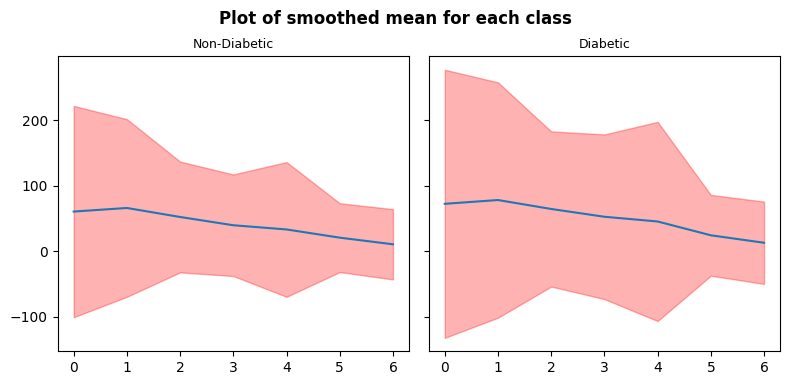

In [74]:
CLASS_NAMES = ["Non-Diabetic", "Diabetic"]


fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
axes = axes.flatten()
for i, label in enumerate(CLASS_NAMES, start=1):
    data_group = df_copy.groupby("Outcome")
    data = data_group.get_group(i-1).mean(axis=0, numeric_only=True).to_numpy()
    plot_smoothed_mean(data, class_name=label, step_size=3, ax=axes[i-1])
fig.suptitle("Plot of smoothed mean for each class", y=0.95, weight="bold")
plt.tight_layout()

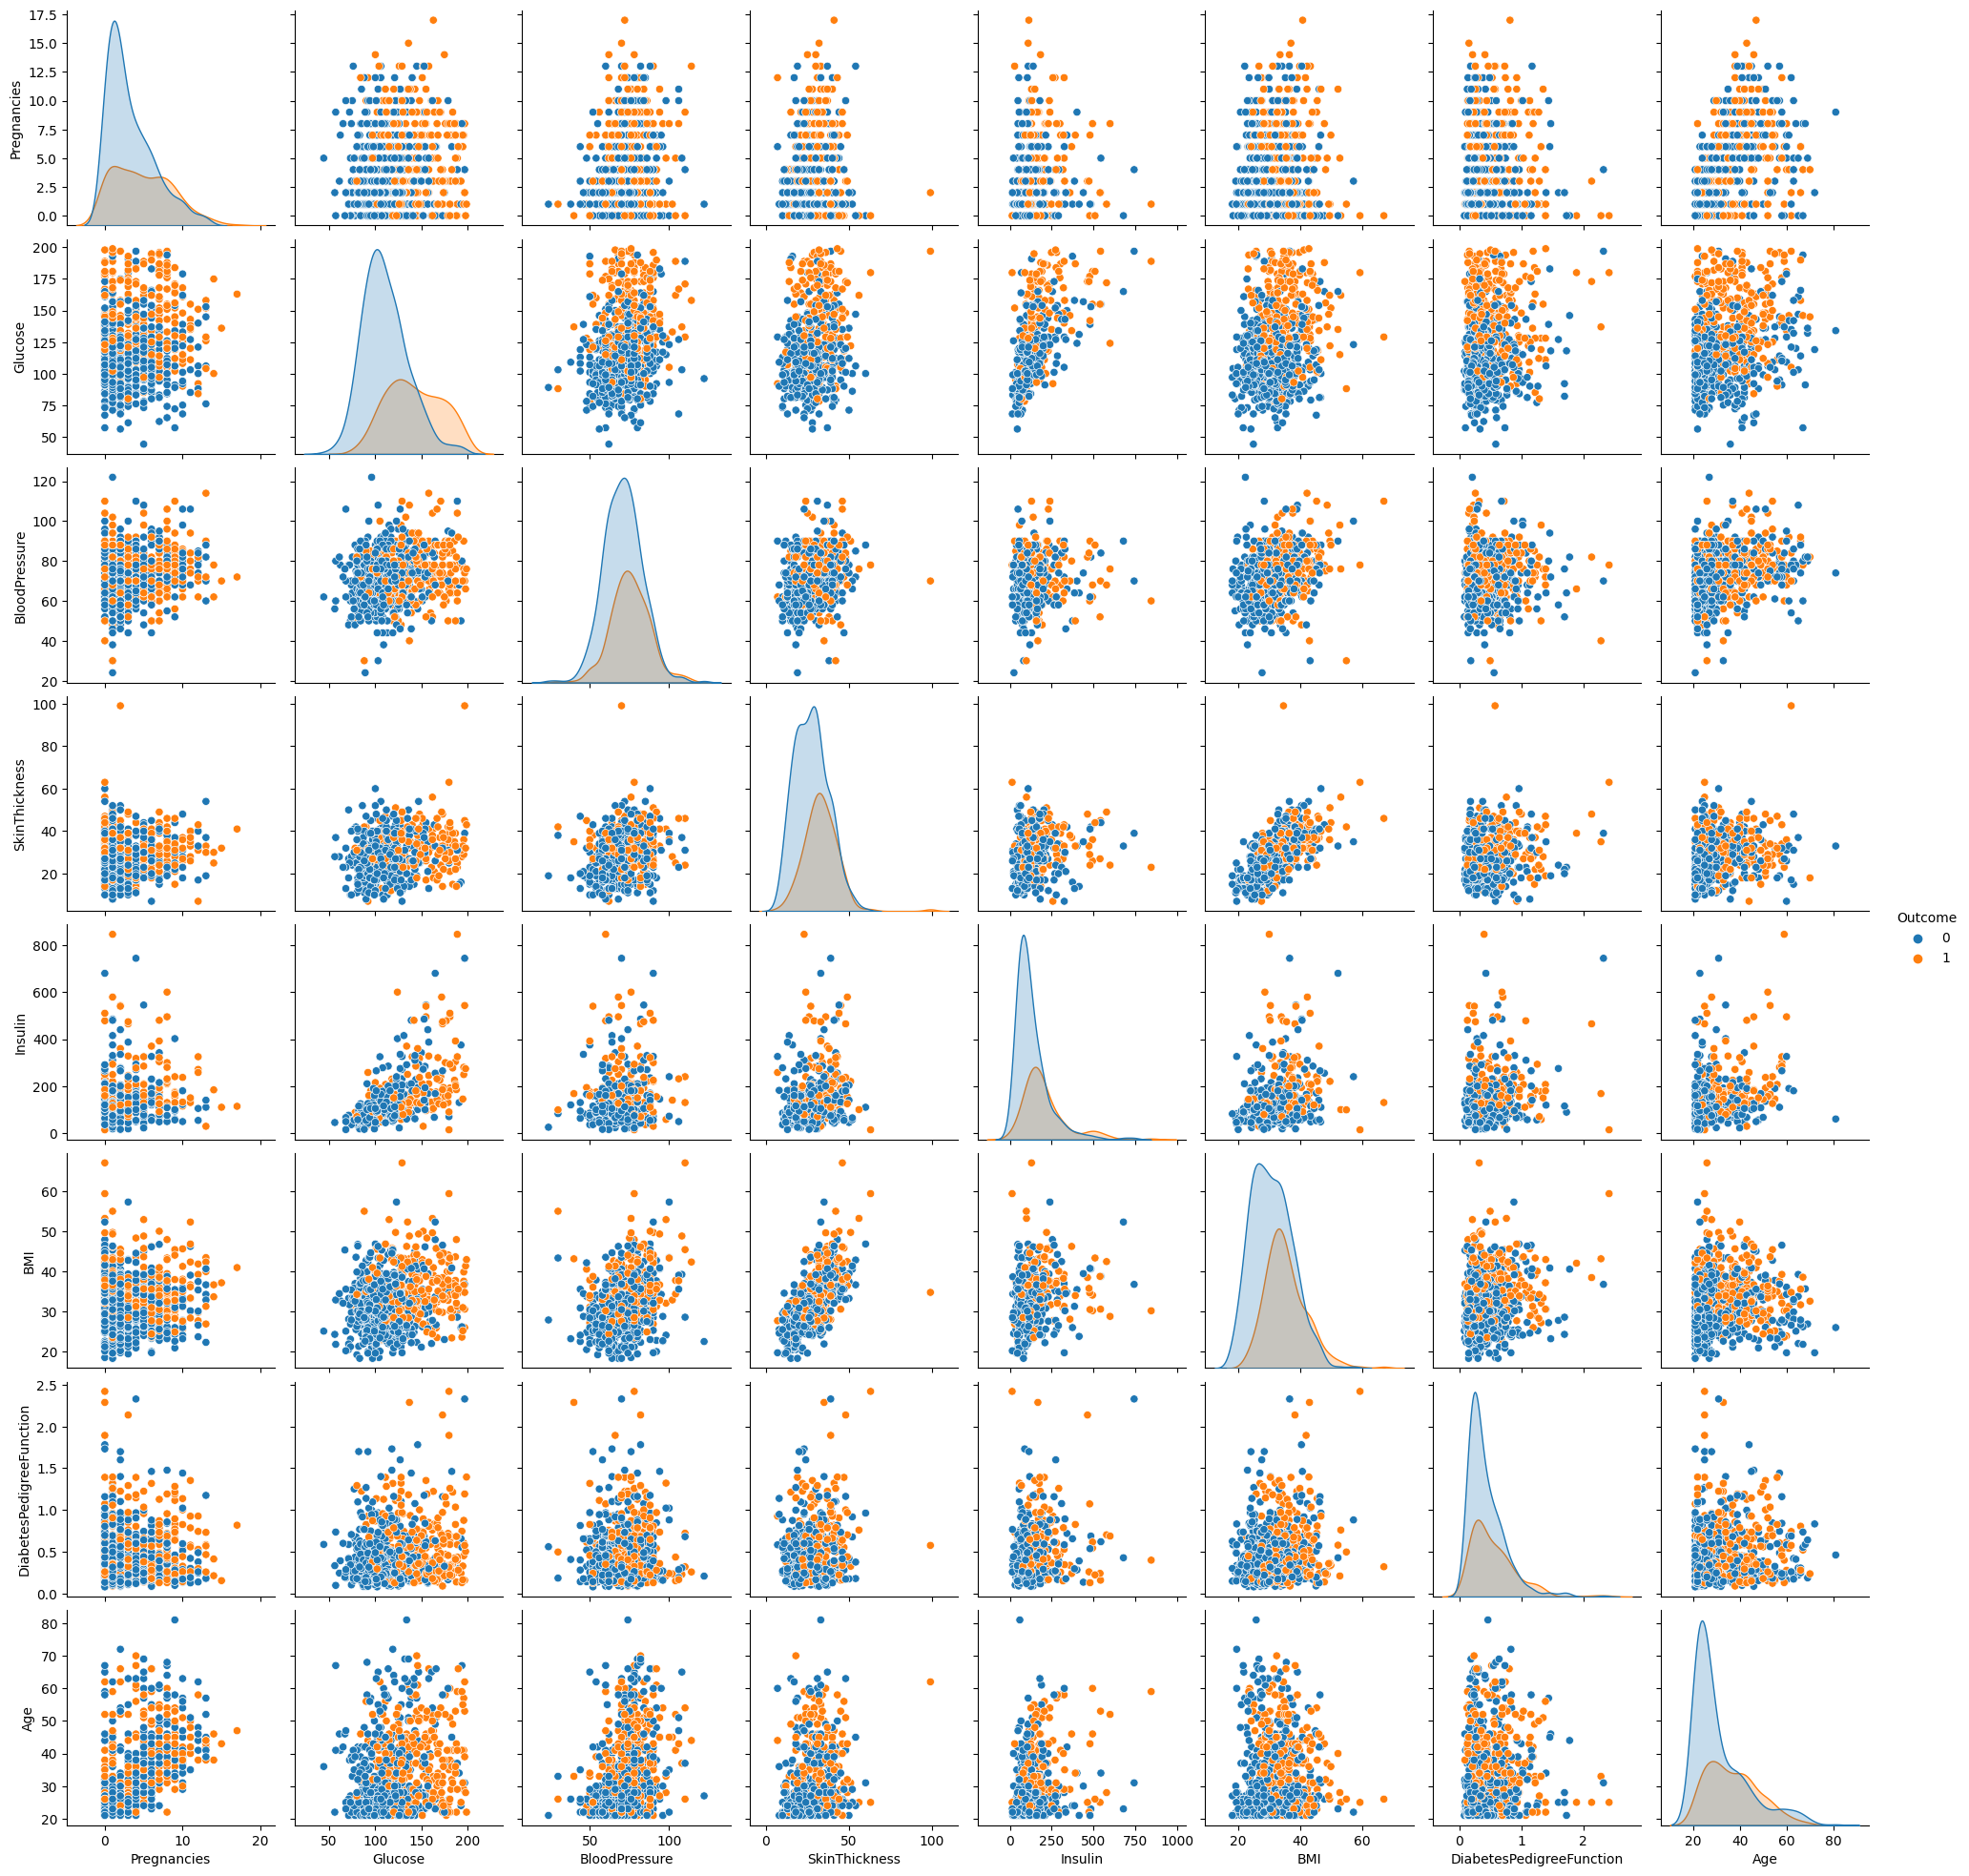

In [75]:
sns.pairplot(df, hue='Outcome')

Text(0.5, 1.0, 'Correlation Heatmap')

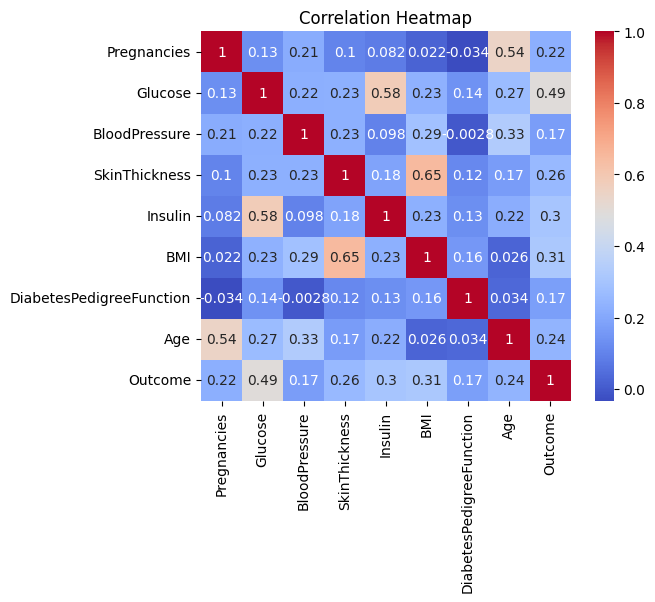

In [76]:
sns.heatmap(df.corr(), square=True, cmap='coolwarm', linecolor='white', annot=True).set_title("Correlation Heatmap")

## Check the accurecy score before start Data Pre-Processing step

In [77]:
df_null = df.copy()

In [78]:
df_null.shape

(768, 9)

In [79]:
df_null.sample(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
273            1     71.0           78.0           50.0     45.0  33.2   
220            0    177.0           60.0           29.0    478.0  34.6   
553            1     88.0           62.0           24.0     44.0  29.9   
219            5    112.0           66.0            NaN      NaN  37.8   
335            0    165.0           76.0           43.0    255.0  47.9   
603            7    150.0           78.0           29.0    126.0  35.2   
640            0    102.0           86.0           17.0    105.0  29.3   
164            0    131.0           88.0            NaN      NaN  31.6   
17             7    107.0           74.0            NaN      NaN  29.6   
192            7    159.0           66.0            NaN      NaN  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
273                     0.422   21        0  
220                     1.072   21        1  
553                     0.422   23        0  
219                     0.261   41        1  
335                     0.259   26        0  
603                     0.692   54        1  
640                     0.695   27        0  
164                     0.743   32        1  
17                      0.254   31        1  
192                     0.383   36        1

In [80]:
df_null.isnull().mean()*100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

### fill the missing value by random value

In [81]:
df_null.fillna(9, inplace=True)

In [82]:
df_null.isnull().sum().sum()

0

In [83]:
df_null.shape

(768, 9)

Now we divide the ECG dataset into input and output section. 
This `X` is input and `y` is output section.

In [84]:
X = df_null.drop(columns=['Outcome'])
y = df_null['Outcome']

In [85]:
X.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      9.0  33.6   
1            1     85.0           66.0           29.0      9.0  26.6   
2            8    183.0           64.0            9.0      9.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

In [86]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

Now we devide this independent `X` and dependent `y` in train and test data.

To divide into train and test data, we use `train_test_split` library.

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

### Model Evaluation

## Naïve Bayes Classifier

In [88]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7291666666666666

In [89]:
# accuracy_score, recall_score, precision_score, confusion_matrix, f1_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.7291666666666666
Recall: 0.5652173913043478
Precision: 0.639344262295082
Confusion Matrix:
 [[101  22]
 [ 30  39]]
F1 Score: 0.6000000000000001
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.80       123
           1       0.64      0.57      0.60        69

    accuracy                           0.73       192
   macro avg       0.71      0.69      0.70       192
weighted avg       0.72      0.73      0.73       192



### 1. Decision Tree

In [149]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test,y_pred)

0.6822916666666666

In [150]:
# accuracy_score, recall_score, precision_score, confusion_matrix, f1_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.6822916666666666
Recall: 0.5441176470588235
Precision: 0.5522388059701493
Confusion Matrix:
 [[94 30]
 [31 37]]
F1 Score: 0.5481481481481482
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.76      0.76       124
           1       0.55      0.54      0.55        68

    accuracy                           0.68       192
   macro avg       0.65      0.65      0.65       192
weighted avg       0.68      0.68      0.68       192



### 2.Random Forest

In [151]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7552083333333334

In [152]:
# accuracy_score, recall_score, precision_score, confusion_matrix, f1_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.7552083333333334
Recall: 0.5735294117647058
Precision: 0.6842105263157895
Confusion Matrix:
 [[106  18]
 [ 29  39]]
F1 Score: 0.6239999999999999
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       124
           1       0.68      0.57      0.62        68

    accuracy                           0.76       192
   macro avg       0.73      0.71      0.72       192
weighted avg       0.75      0.76      0.75       192



### 3. XGBoost

In [153]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test, y_pred)

0.7395833333333334

In [154]:
# accuracy_score, recall_score, precision_score, confusion_matrix, f1_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.7395833333333334
Recall: 0.6176470588235294
Precision: 0.6363636363636364
Confusion Matrix:
 [[100  24]
 [ 26  42]]
F1 Score: 0.6268656716417911
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       124
           1       0.64      0.62      0.63        68

    accuracy                           0.74       192
   macro avg       0.72      0.71      0.71       192
weighted avg       0.74      0.74      0.74       192



**Without Data Preprocessing the Diabetes Dataset gives us the best accurecy score of 73.9% using Random Forest Algorithm.**

This dist_plot function need dataframe as a input and it gives boxplot and kdeplot of all the feature that can be present in the given dataset

In [90]:
# function for plot boxplot and kdeplot
def dist_plot (df_plot):
    for feature in df_plot.columns:
        position=121+10
        plt.figure(figsize=(15,4))
        plt.subplot(position)
        sns.boxplot(x=feature, data=df_plot)
        plt.subplot(position+1)
        sns.distplot(df_plot[feature])

**IQR Method**

This technique uses the IQR scores calculated earlier to remove outliers. The rule of thumb is that anything not in the range of  (Q1−1.5IQR)  and  (Q3+1.5IQR) is an outlier, and can be removed.

In [91]:
#function for remove outliers
def remove_outliers(df_1):
    Q1 = df_1.quantile(0.25)
    Q3 = df_1.quantile(0.75)
    IQR = Q3 - Q1
    df_1_out = df_1[~((df_1 < (Q1 - 1.5 * IQR)) | (df_1 > (Q3 + 1.5 * IQR))).any(axis=1)]
    print(f'Before: {df_1.shape}, After: {df_1_out.shape}')
    
    return df_1_out

## Cleaning the dataset

**Percentages of NaNs**

In [92]:
df.isnull().mean()*100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

<AxesSubplot: >

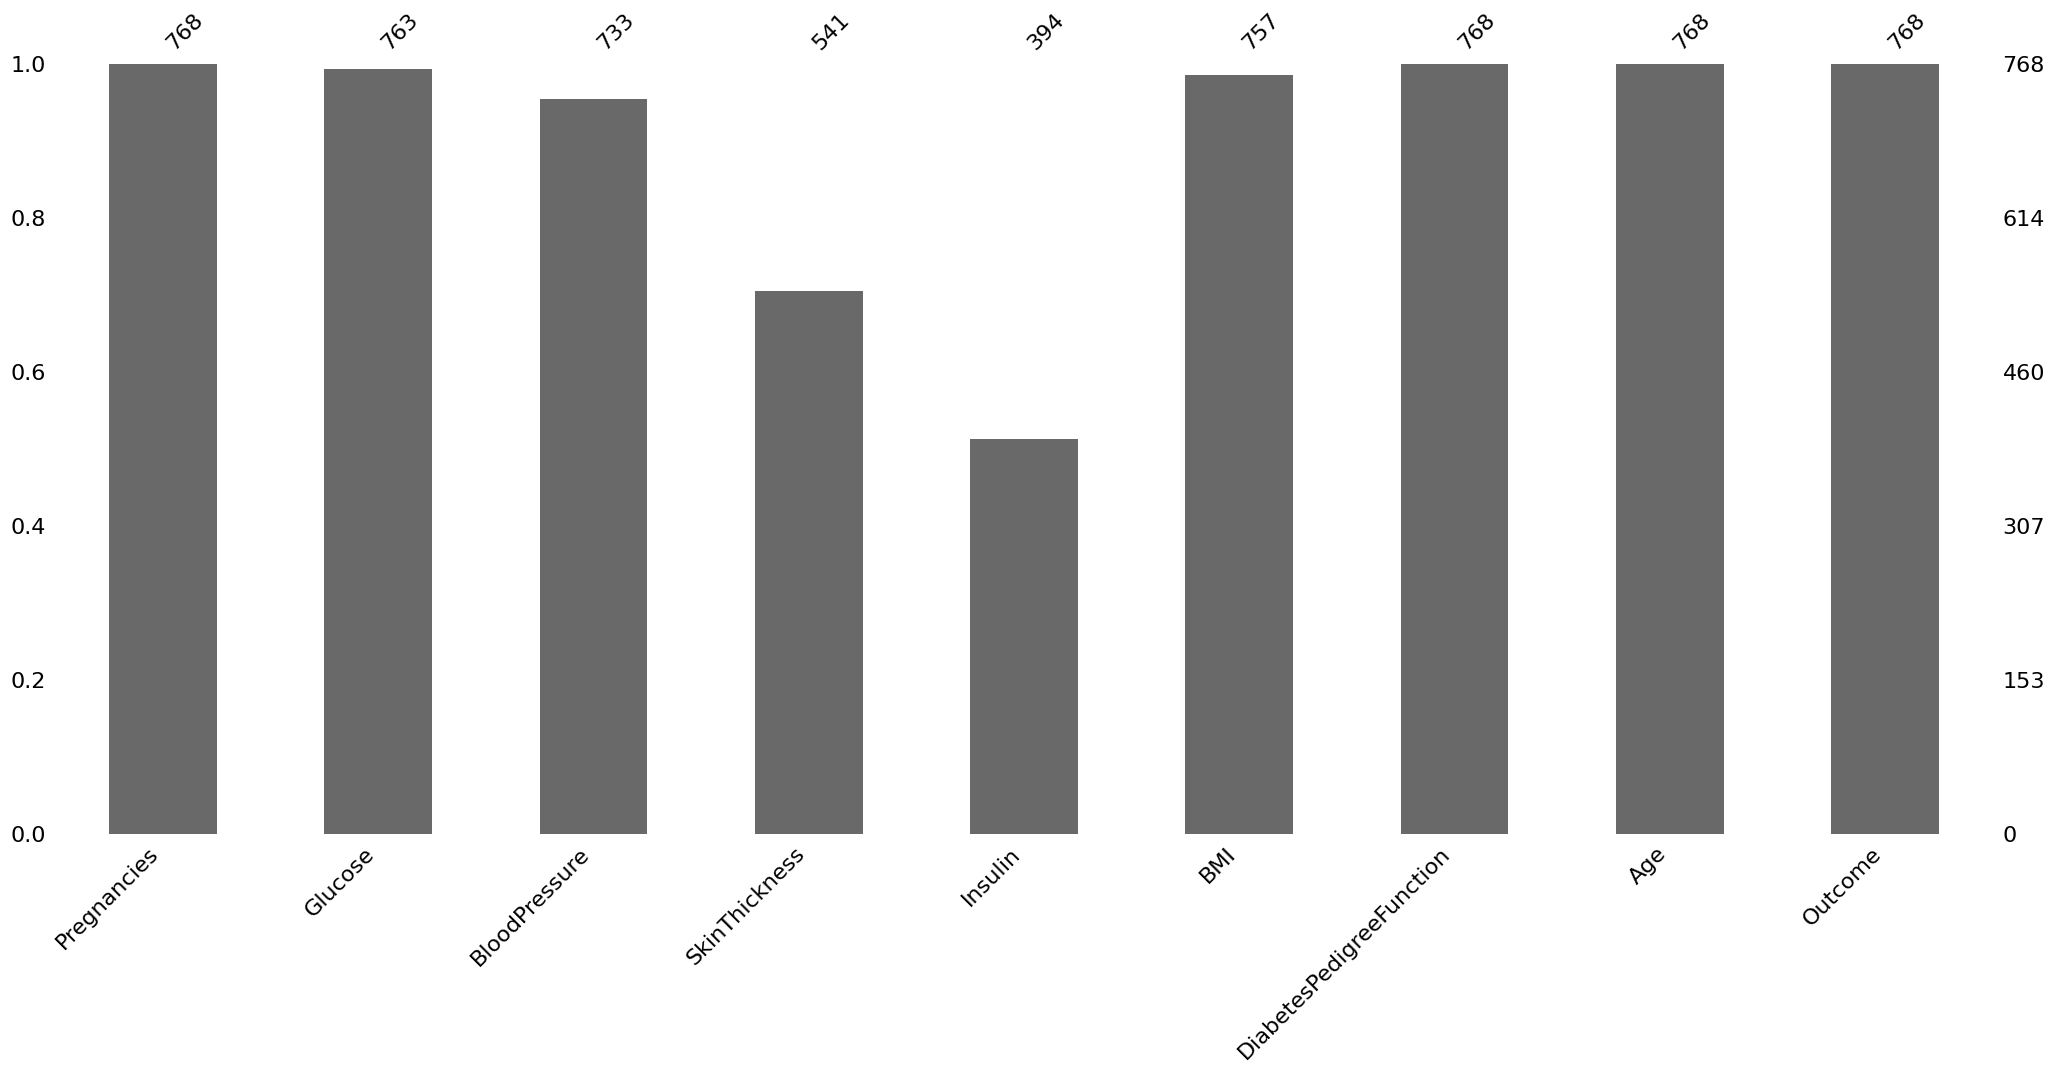

In [93]:
msno.bar(df)

#### Matrix


##### How to read?

Each row in the matrix represents that row in the dataset. If any value in that row is NaN, then it is white else black(/gray).

The graph on the right shows the number of missing values in each row. If a row has too many NaN values, we can remove that.

<AxesSubplot: >

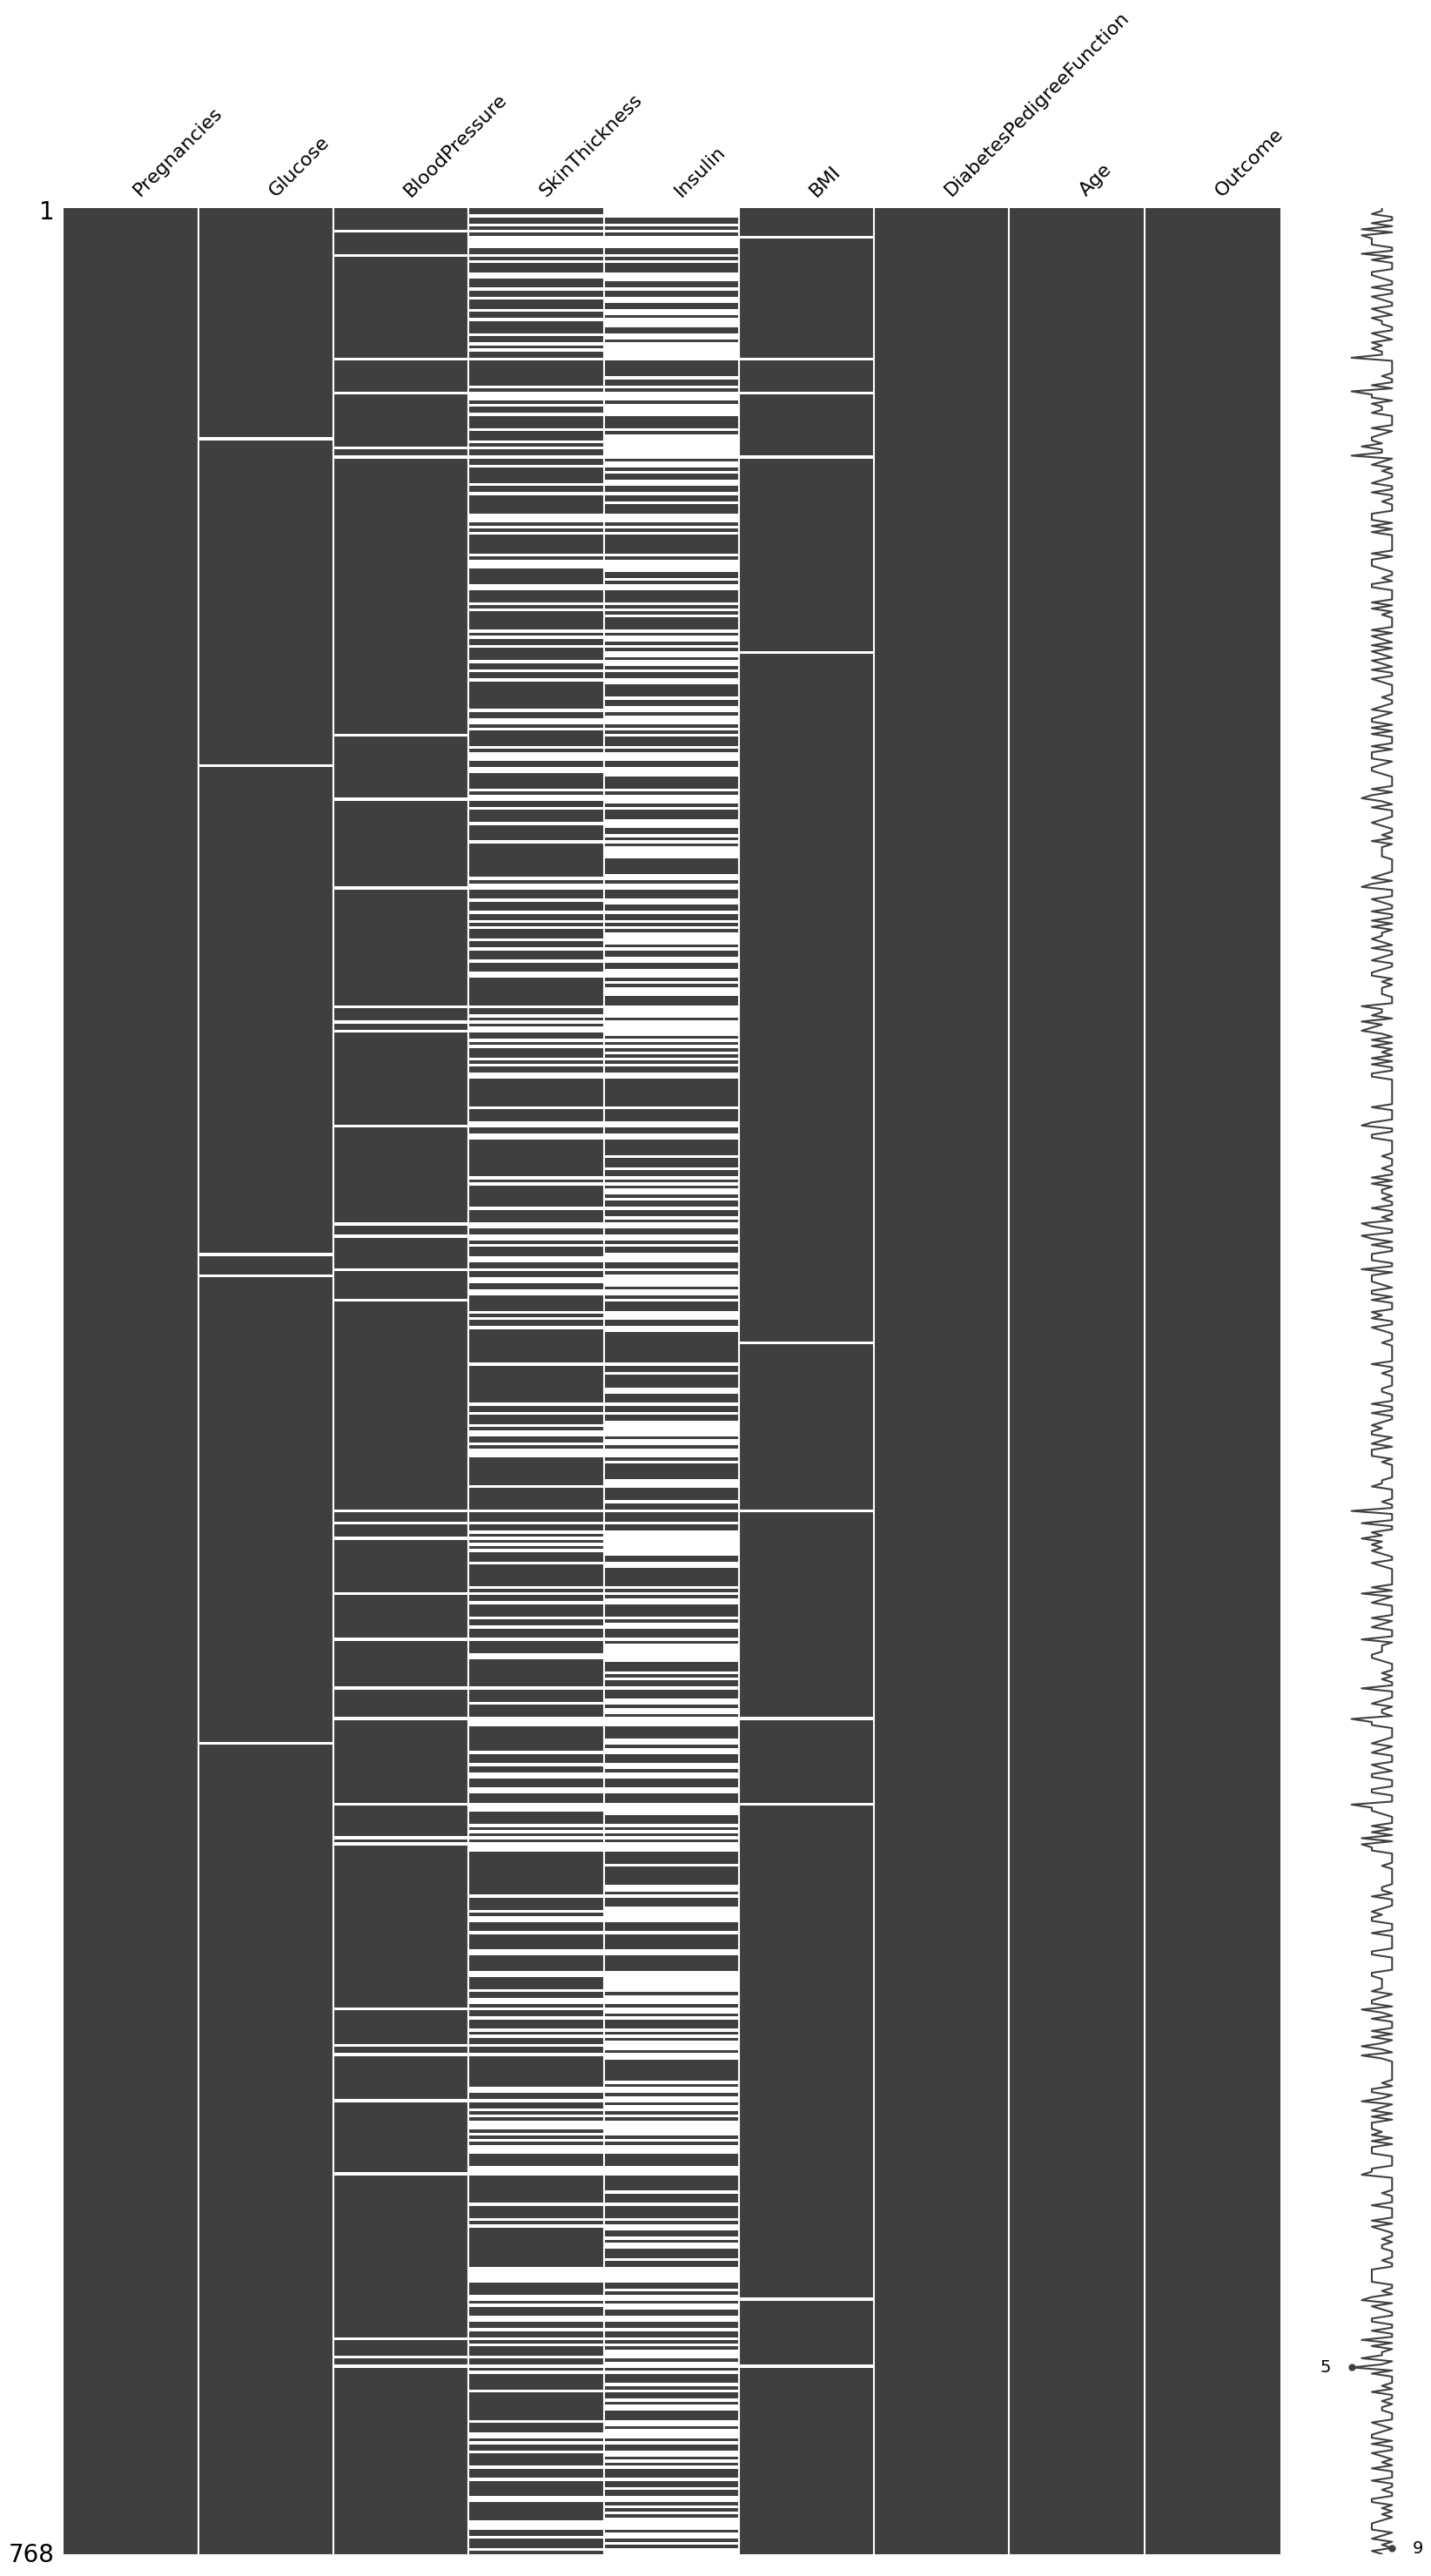

In [94]:
msno.matrix(df, figsize=(20,35))

#### Heatmap


The heatmap is used to identify correlations of the nullity between each of the different columns.

<AxesSubplot: >

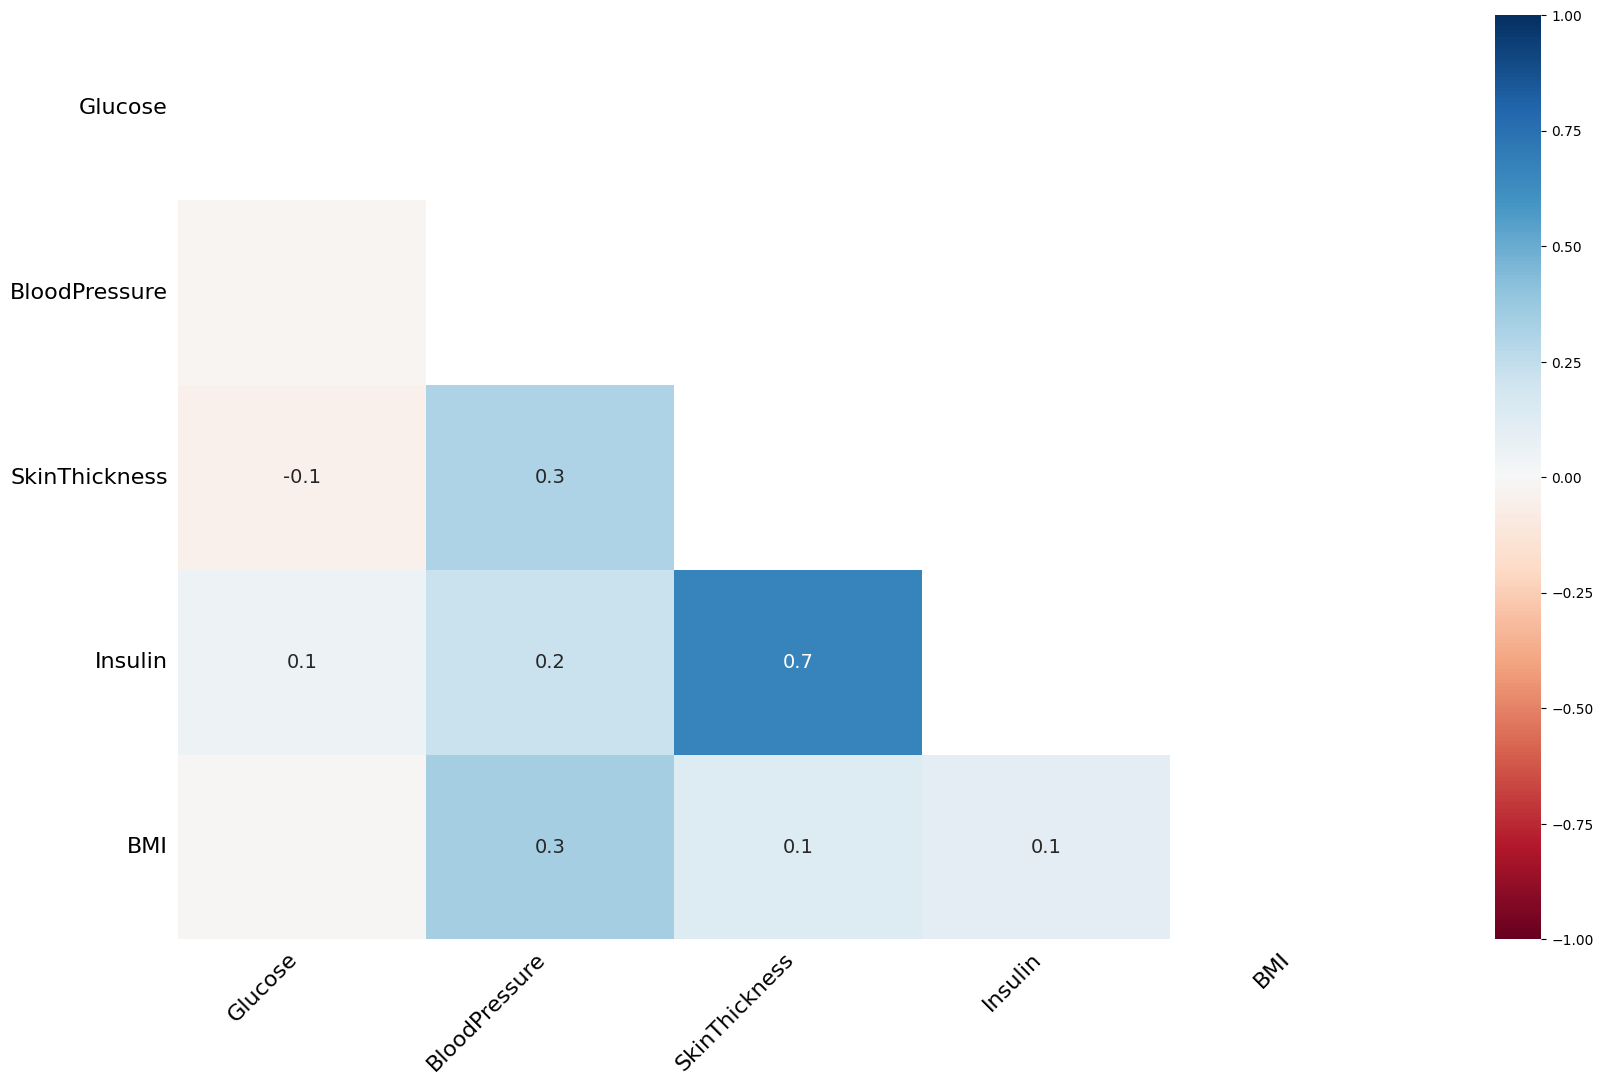

In [95]:
msno.heatmap(df)

**We can see that the Insulin column has nearly 50% of NaN values. Therefore, it would be wise to drop the column entirely!**

In [96]:
df.drop(columns=['Insulin'], inplace=True)

In [97]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness   BMI  \
0              6    148.0           72.0           35.0  33.6   
1              1     85.0           66.0           29.0  26.6   
2              8    183.0           64.0            NaN  23.3   
3              1     89.0           66.0           23.0  28.1   
4              0    137.0           40.0           35.0  43.1   
5              5    116.0           74.0            NaN  25.6   
6              3     78.0           50.0           32.0  31.0   
7             10    115.0            NaN            NaN  35.3   
8              2    197.0           70.0           45.0  30.5   
9              8    125.0           96.0            NaN   NaN   
10             4    110.0           92.0            NaN  37.6   
11            10    168.0           74.0            NaN  38.0   
12            10    139.0           80.0            NaN  27.1   
13             1    189.0           60.0           23.0  30.1   
14             5    166.0           72.0           19.0  25.8   
15             7    100.0            NaN            NaN  30.0   
16             0    118.0           84.0           47.0  45.8   
17             7    107.0           74.0            NaN  29.6   
18             1    103.0           30.0           38.0  43.3   
19             1    115.0           70.0           30.0  34.6   
20             3    126.0           88.0           41.0  39.3   
21             8     99.0           84.0            NaN  35.4   
22             7    196.0           90.0            NaN  39.8   
23             9    119.0           80.0           35.0  29.0   
24            11    143.0           94.0           33.0  36.6   
25            10    125.0           70.0           26.0  31.1   
26             7    147.0           76.0            NaN  39.4   
27             1     97.0           66.0           15.0  23.2   
28            13    145.0           82.0           19.0  22.2   
29             5    117.0           92.0            NaN  34.1   
30             5    109.0           75.0           26.0  36.0   
31             3    158.0           76.0           36.0  31.6   
32             3     88.0           58.0           11.0  24.8   
33             6     92.0           92.0            NaN  19.9   
34            10    122.0           78.0           31.0  27.6   
35             4    103.0           60.0           33.0  24.0   
36            11    138.0           76.0            NaN  33.2   
37             9    102.0           76.0           37.0  32.9   
38             2     90.0           68.0           42.0  38.2   
39             4    111.0           72.0           47.0  37.1   
40             3    180.0           64.0           25.0  34.0   
41             7    133.0           84.0            NaN  40.2   
42             7    106.0           92.0           18.0  22.7   
43             9    171.0          110.0           24.0  45.4   
44             7    159.0           64.0            NaN  27.4   
45             0    180.0           66.0           39.0  42.0   
46             1    146.0           56.0            NaN  29.7   
47             2     71.0           70.0           27.0  28.0   
48             7    103.0           66.0           32.0  39.1   
49             7    105.0            NaN            NaN   NaN   
50             1    103.0           80.0           11.0  19.4   
51             1    101.0           50.0           15.0  24.2   
52             5     88.0           66.0           21.0  24.4   
53             8    176.0           90.0           34.0  33.7   
54             7    150.0           66.0           42.0  34.7   
55             1     73.0           50.0           10.0  23.0   
56             7    187.0           68.0           39.0  37.7   
57             0    100.0           88.0           60.0  46.8   
58             0    146.0           82.0            NaN  40.5   
59             0    105.0           64.0           41.0  41.5   
60             2     84.0            NaN

In [98]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness         BMI  \
count   768.000000  763.000000     733.000000     541.000000  757.000000   
mean      3.845052  121.686763      72.405184      29.153420   32.457464   
std       3.369578   30.535641      12.382158      10.476982    6.924988   
min       0.000000   44.000000      24.000000       7.000000   18.200000   
25%       1.000000   99.000000      64.000000      22.000000   27.500000   
50%       3.000000  117.000000      72.000000      29.000000   32.300000   
75%       6.000000  141.000000      80.000000      36.000000   36.600000   
max      17.000000  199.000000     122.000000      99.000000   67.100000   

       DiabetesPedigreeFunction         Age     Outcome  
count                768.000000  768.000000  768.000000  
mean                   0.471876   33.240885    0.348958  
std                    0.331329   11.760232    0.476951  
min                    0.078000   21.000000    0.000000  
25%                    0.243750   24.000000    0.000000  
50%                    0.372500   29.000000    0.000000  
75%                    0.626250   41.000000    1.000000  
max                    2.420000   81.000000    1.000000

In [99]:
df.skew()

Pregnancies                 0.901674
Glucose                     0.530989
BloodPressure               0.134153
SkinThickness               0.690619
BMI                         0.593970
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

## Data Cleaning 

### 1  Remove them

In [124]:
df.shape

(768, 8)

Here we can use dropna() function to remove null value row.

In [125]:
df_1 = df.dropna()

In [126]:
df_1.shape

(532, 8)

After removing Nan value rows, we have 532 rows out of 768 rows.

### Advantages of Removing Rows (Data Cleaning Method):

**Simplicity:** Removing rows with problematic data is a straightforward and easy-to-implement data cleaning method.

**Preservation of Data Quality:** By removing rows with extreme outliers or missing values, you can maintain the overall quality of the remaining data.

**Improved Model Performance:** Removing rows with outliers can prevent them from influencing statistical models, leading to more accurate and robust results.

### Disadvantages of Removing Rows (Data Cleaning Method):

**Data Loss:** The most significant drawback is that removing rows results in the loss of potentially valuable information. If the removed rows contain relevant data, it can lead to a loss of insight and reduced model accuracy.

**Biased Results:** Removing data points can introduce bias into your analysis, especially if the removal process is not random. This bias can affect the representativeness of your dataset and lead to skewed results.

**Reduced Sample Size:** A smaller dataset may have reduced statistical power and might not adequately capture the underlying population characteristics.

**Incompleteness:** If too many rows are removed due to missing data, you might end up with an incomplete dataset that lacks sufficient information for meaningful analysis.


C:\Users\mamit\AppData\Local\Temp\ipykernel_11980\937455760.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_plot[feature])
C:\Users\mamit\AppData\Local\Temp\ipykernel_11980\937455760.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_plot[feature])
C:\Users\mamit\AppData\Local\Temp\ip

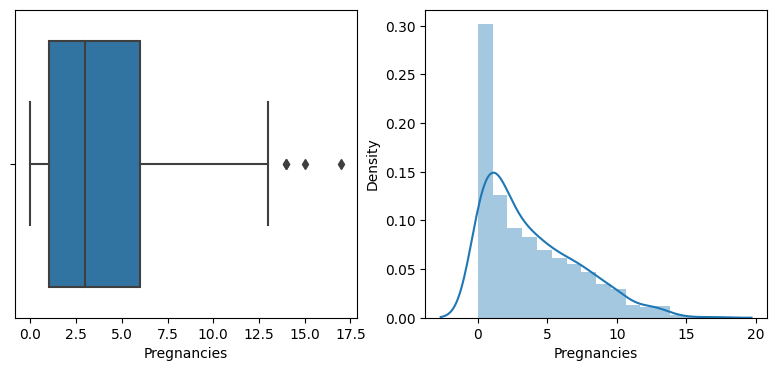

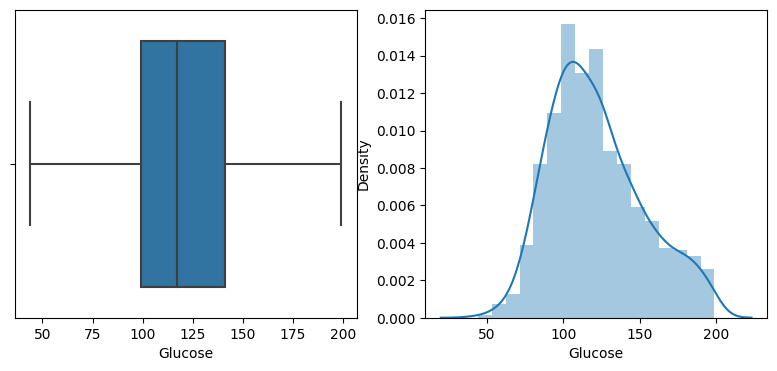

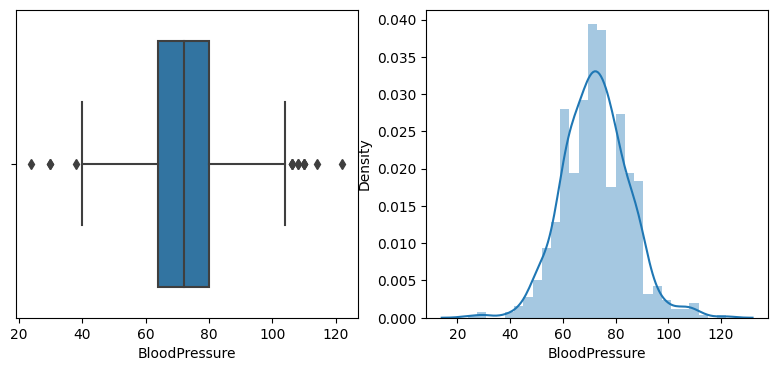

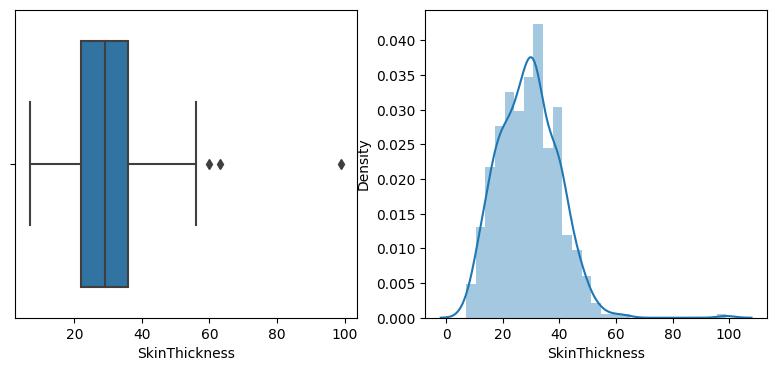

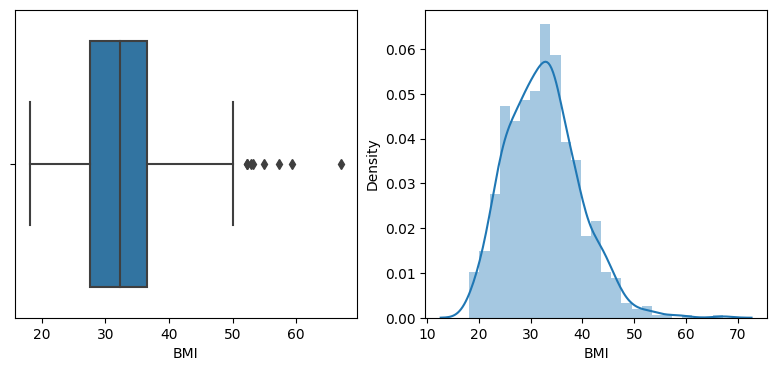

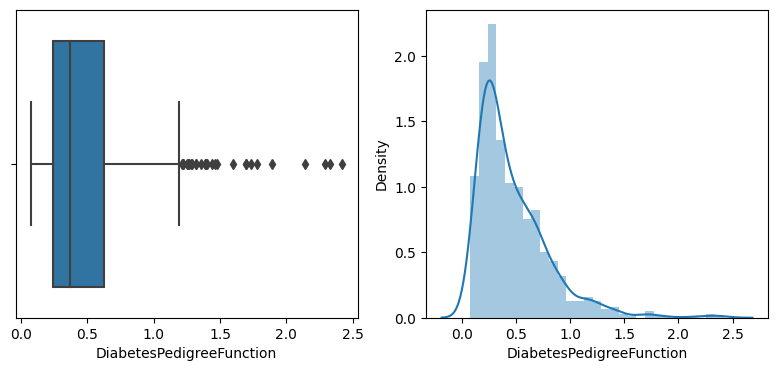

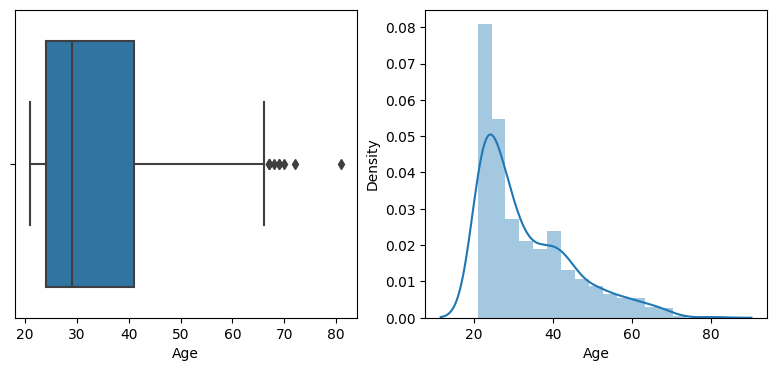

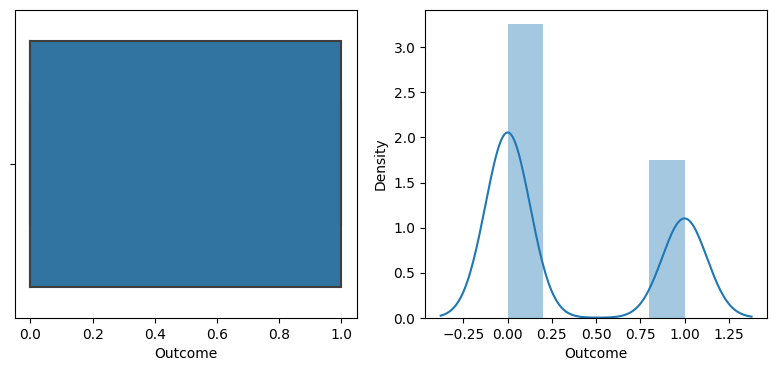

In [127]:
dist_plot(df)

C:\Users\mamit\AppData\Local\Temp\ipykernel_11980\937455760.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_plot[feature])
C:\Users\mamit\AppData\Local\Temp\ipykernel_11980\937455760.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_plot[feature])
C:\Users\mamit\AppData\Local\Temp\ip

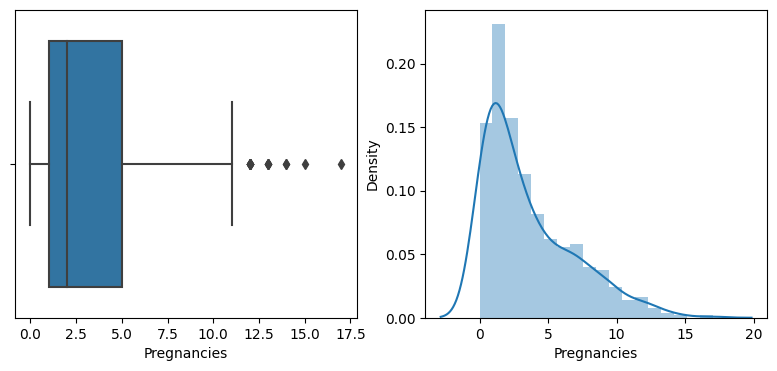

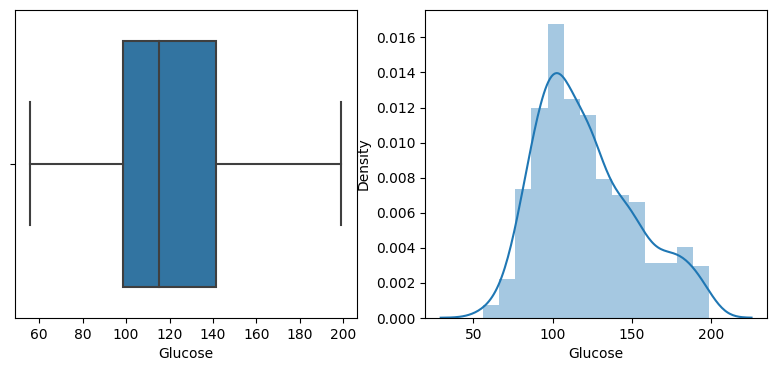

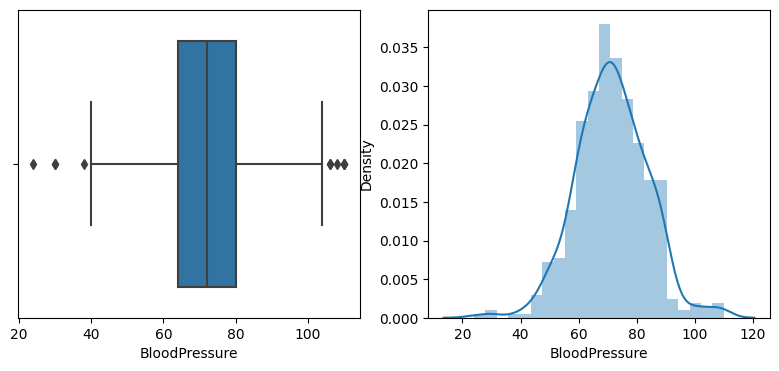

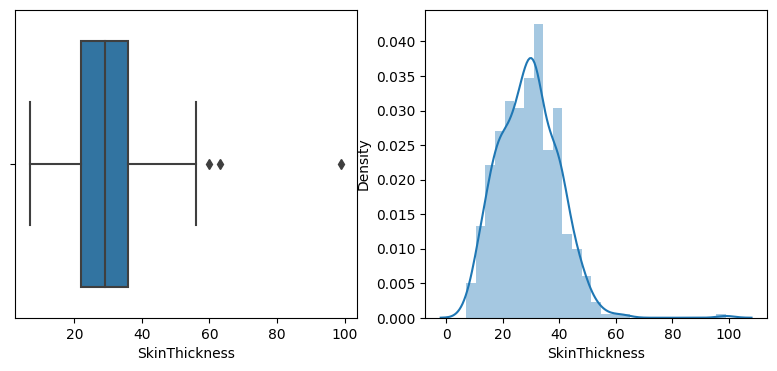

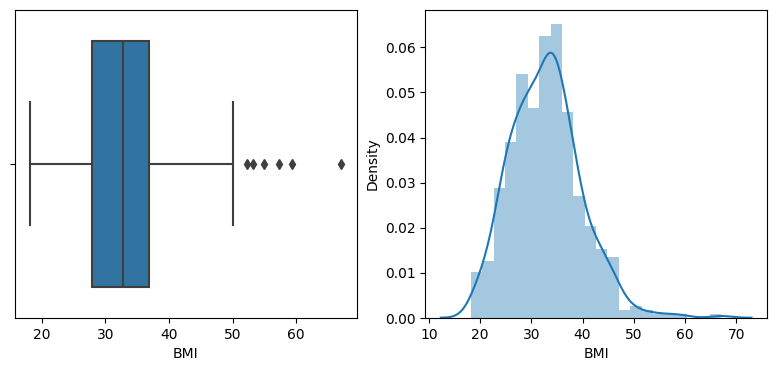

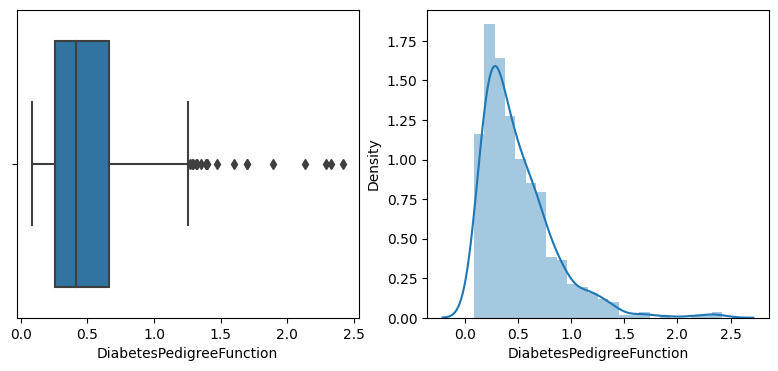

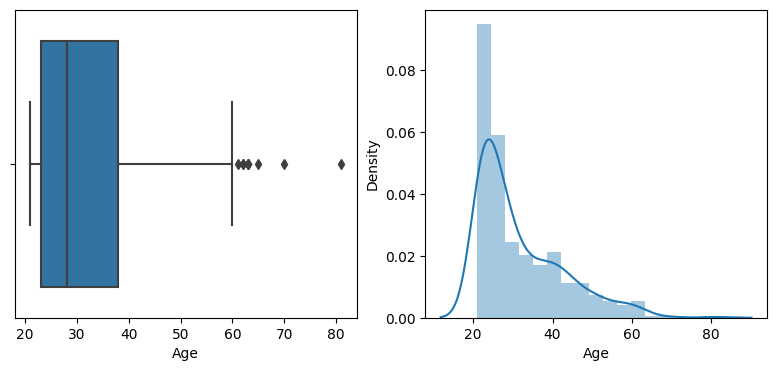

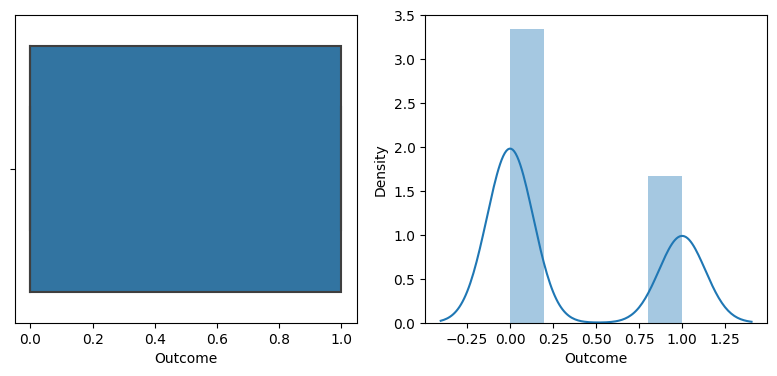

In [128]:
dist_plot(df_1)

Now we need to remove outliers from the features

Before: (532, 8), After: (476, 8)


C:\Users\mamit\AppData\Local\Temp\ipykernel_11980\937455760.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_plot[feature])
C:\Users\mamit\AppData\Local\Temp\ipykernel_11980\937455760.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_plot[feature])
C:\Users\mamit\AppData\Local\Temp\ip

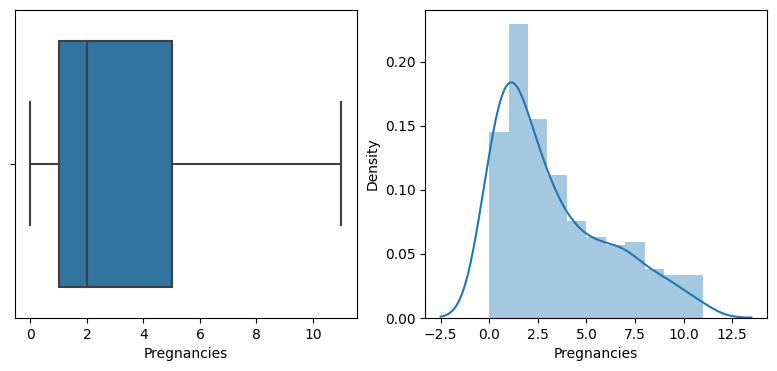

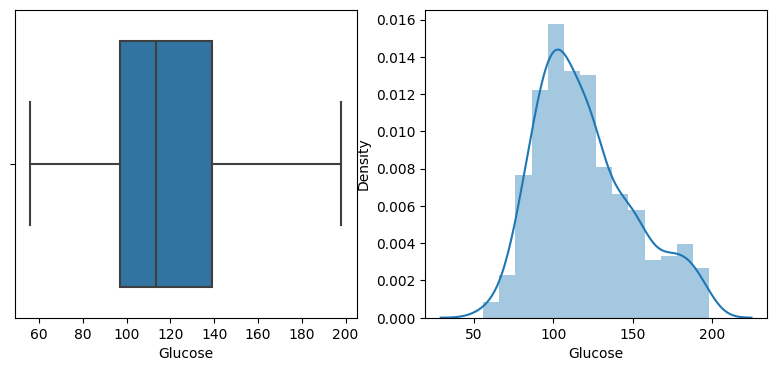

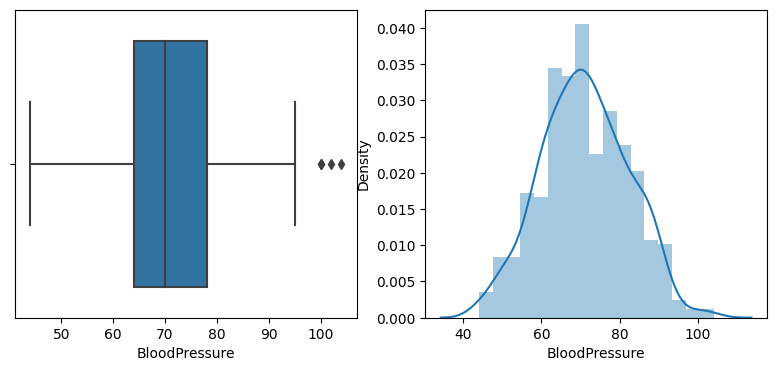

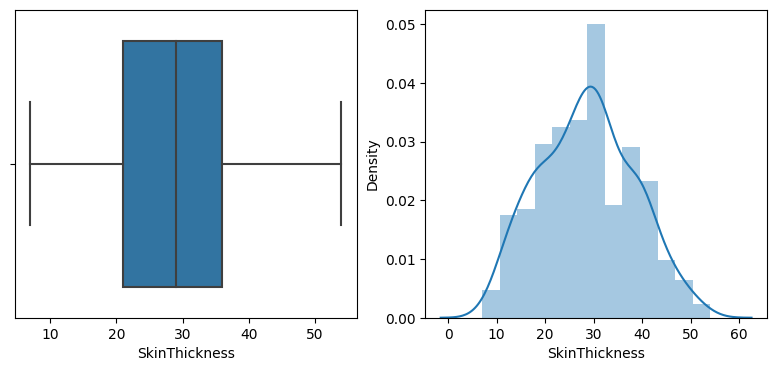

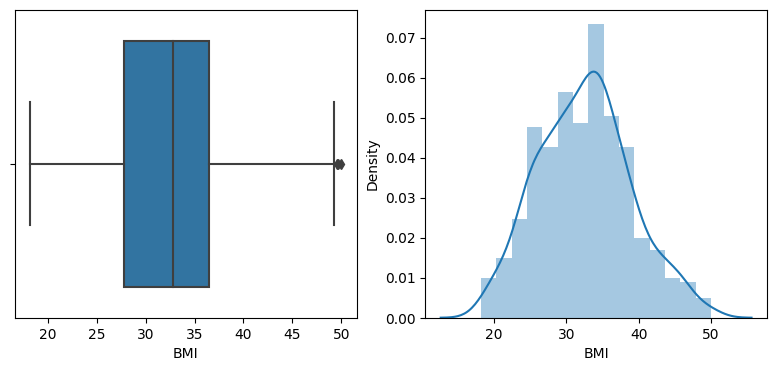

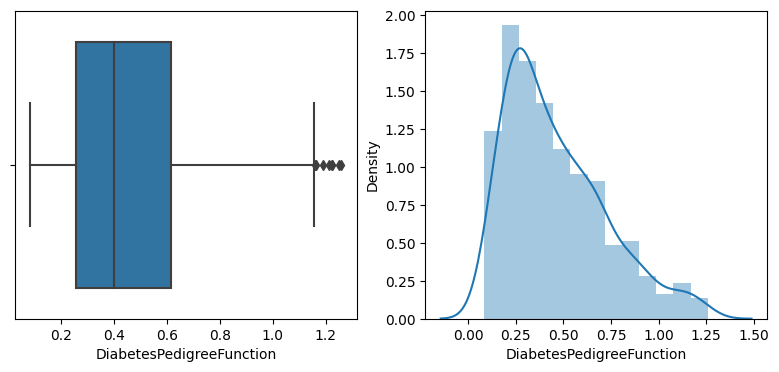

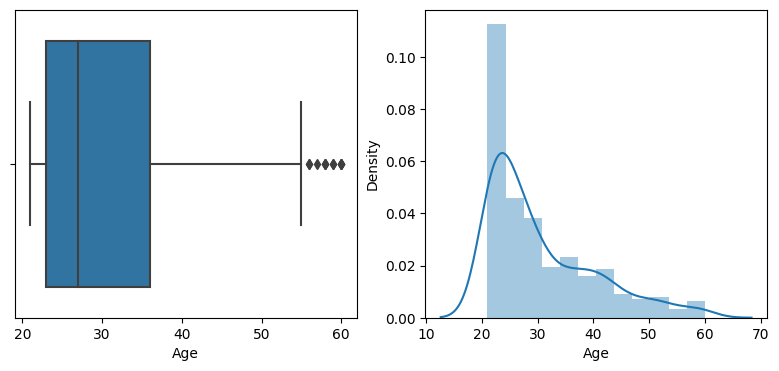

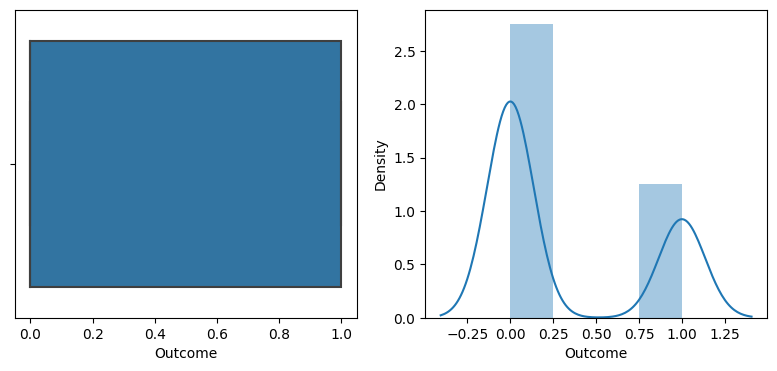

In [129]:
df_1_out = remove_outliers(df_1)
dist_plot(df_1_out)

Before the outliers remove the number of rows is 532 and After remove outliers the number of row is 476.

### Model Evaluation

**Split the data**

In [130]:
X = df_1_out[df_1_out.columns[:-1]]
y = df_1_out['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

#### Normalize the data

In [131]:
norm = StandardScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

### Model Evaluation

## Naïve Bayes Classifier

In [132]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_norm, y_train)
y_pred = gnb.predict(X_test_norm)
accuracy_score(y_test,y_pred)

0.8125

In [109]:
# accuracy_score, recall_score, precision_score, confusion_matrix, f1_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.8125
Recall: 0.6666666666666666
Precision: 0.7142857142857143
Confusion Matrix:
 [[58  8]
 [10 20]]
F1 Score: 0.689655172413793
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87        66
           1       0.71      0.67      0.69        30

    accuracy                           0.81        96
   macro avg       0.78      0.77      0.78        96
weighted avg       0.81      0.81      0.81        96



### 1. Decision Tree

In [173]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_norm,y_train)
y_pred = dt.predict(X_test_norm)
accuracy_score(y_test,y_pred)

0.78125

In [174]:
# accuracy_score, recall_score, precision_score, confusion_matrix, f1_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.78125
Recall: 0.6666666666666666
Precision: 0.6451612903225806
Confusion Matrix:
 [[55 11]
 [10 20]]
F1 Score: 0.6557377049180327
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84        66
           1       0.65      0.67      0.66        30

    accuracy                           0.78        96
   macro avg       0.75      0.75      0.75        96
weighted avg       0.78      0.78      0.78        96



### 2.Random Forest

In [175]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_norm,y_train)
y_pred = rf.predict(X_test_norm)
accuracy_score(y_test,y_pred)

0.8541666666666666

In [176]:
# accuracy_score, recall_score, precision_score, confusion_matrix, f1_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.8541666666666666
Recall: 0.6666666666666666
Precision: 0.8333333333333334
Confusion Matrix:
 [[62  4]
 [10 20]]
F1 Score: 0.7407407407407408
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90        66
           1       0.83      0.67      0.74        30

    accuracy                           0.85        96
   macro avg       0.85      0.80      0.82        96
weighted avg       0.85      0.85      0.85        96



### 3. XGBoost

In [177]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train_norm, y_train)
y_pred = xgb.predict(X_test_norm)
accuracy_score(y_test, y_pred)

0.7604166666666666

In [178]:
# accuracy_score, recall_score, precision_score, confusion_matrix, f1_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.7604166666666666
Recall: 0.5333333333333333
Precision: 0.64
Confusion Matrix:
 [[57  9]
 [14 16]]
F1 Score: 0.5818181818181818
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83        66
           1       0.64      0.53      0.58        30

    accuracy                           0.76        96
   macro avg       0.72      0.70      0.71        96
weighted avg       0.75      0.76      0.75        96



**Here we can see the accuracy of Random Forest Model is more 83.3%, so here Random Forest Model is best perform.**

### 2. Univariate Imputation

In this Univariate Imputation using `mean()` , `median()` , `mode()` we fill the null values and remove the null values from dataset.

The best advantage of this technique is here the number of row not reduce means the shape of dataset in constant.

In [133]:
df.shape

(768, 8)

Here we are perform Univariate mean() imputation, for filling Nan values.

In [134]:
df.isnull().mean()*100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

In [135]:
df_2 = df.copy()
df_2

Pregnancies  Glucose  BloodPressure  SkinThickness   BMI  \
0              6    148.0           72.0           35.0  33.6   
1              1     85.0           66.0           29.0  26.6   
2              8    183.0           64.0            NaN  23.3   
3              1     89.0           66.0           23.0  28.1   
4              0    137.0           40.0           35.0  43.1   
5              5    116.0           74.0            NaN  25.6   
6              3     78.0           50.0           32.0  31.0   
7             10    115.0            NaN            NaN  35.3   
8              2    197.0           70.0           45.0  30.5   
9              8    125.0           96.0            NaN   NaN   
10             4    110.0           92.0            NaN  37.6   
11            10    168.0           74.0            NaN  38.0   
12            10    139.0           80.0            NaN  27.1   
13             1    189.0           60.0           23.0  30.1   
14             5    166.0           72.0           19.0  25.8   
15             7    100.0            NaN            NaN  30.0   
16             0    118.0           84.0           47.0  45.8   
17             7    107.0           74.0            NaN  29.6   
18             1    103.0           30.0           38.0  43.3   
19             1    115.0           70.0           30.0  34.6   
20             3    126.0           88.0           41.0  39.3   
21             8     99.0           84.0            NaN  35.4   
22             7    196.0           90.0            NaN  39.8   
23             9    119.0           80.0           35.0  29.0   
24            11    143.0           94.0           33.0  36.6   
25            10    125.0           70.0           26.0  31.1   
26             7    147.0           76.0            NaN  39.4   
27             1     97.0           66.0           15.0  23.2   
28            13    145.0           82.0           19.0  22.2   
29             5    117.0           92.0            NaN  34.1   
30             5    109.0           75.0           26.0  36.0   
31             3    158.0           76.0           36.0  31.6   
32             3     88.0           58.0           11.0  24.8   
33             6     92.0           92.0            NaN  19.9   
34            10    122.0           78.0           31.0  27.6   
35             4    103.0           60.0           33.0  24.0   
36            11    138.0           76.0            NaN  33.2   
37             9    102.0           76.0           37.0  32.9   
38             2     90.0           68.0           42.0  38.2   
39             4    111.0           72.0           47.0  37.1   
40             3    180.0           64.0           25.0  34.0   
41             7    133.0           84.0            NaN  40.2   
42             7    106.0           92.0           18.0  22.7   
43             9    171.0          110.0           24.0  45.4   
44             7    159.0           64.0            NaN  27.4   
45             0    180.0           66.0           39.0  42.0   
46             1    146.0           56.0            NaN  29.7   
47             2     71.0           70.0           27.0  28.0   
48             7    103.0           66.0           32.0  39.1   
49             7    105.0            NaN            NaN   NaN   
50             1    103.0           80.0           11.0  19.4   
51             1    101.0           50.0           15.0  24.2   
52             5     88.0           66.0           21.0  24.4   
53             8    176.0           90.0           34.0  33.7   
54             7    150.0           66.0           42.0  34.7   
55             1     73.0           50.0           10.0  23.0   
56             7    187.0           68.0           39.0  37.7   
57             0    100.0           88.0           60.0  46.8   
58             0    146.0           82.0            NaN  40.5   
59             0    105.0           64.0           41.0  41.5   
60             2     84.0            NaN

In [136]:
df_2['Glucose'].fillna(df_2['Glucose'].mean(), inplace=True)
df_2['BloodPressure'].fillna(df_2['BloodPressure'].mean(), inplace=True)
df_2['SkinThickness'].fillna(df_2['SkinThickness'].mean(), inplace=True)
df_2['BMI'].fillna(df_2['BMI'].mean(), inplace=True)

In [137]:
df_2.isnull().mean()*100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [138]:
df_2.shape

(768, 8)

Using this technique the shape of data is same.

### Advantages of Mean Value Imputation:

**Simplicity:** Easy to understand and implement.

**Preservation of Data Size:** Retains the original number of rows.

**No Data Loss:** Doesn't result in data loss, keeping all data points.

**Minimal Impact on Distribution:** Tends to minimally affect the overall data distribution.

### Disadvantages of Mean Value Imputation:

**Bias:** Assumes missing data is random, which can introduce bias.

**Underestimation of Variability:** May underestimate data variability.

**Distortion of Relationships:** May not preserve accurate relationships between variables.

**Impact on Outliers:** Sensitive to extreme outliers, potentially distorting results.

**Assumption of Normality:** Assumes data follows a normal distribution, which may not be the case.


C:\Users\mamit\AppData\Local\Temp\ipykernel_11980\937455760.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_plot[feature])
C:\Users\mamit\AppData\Local\Temp\ipykernel_11980\937455760.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_plot[feature])
C:\Users\mamit\AppData\Local\Temp\ip

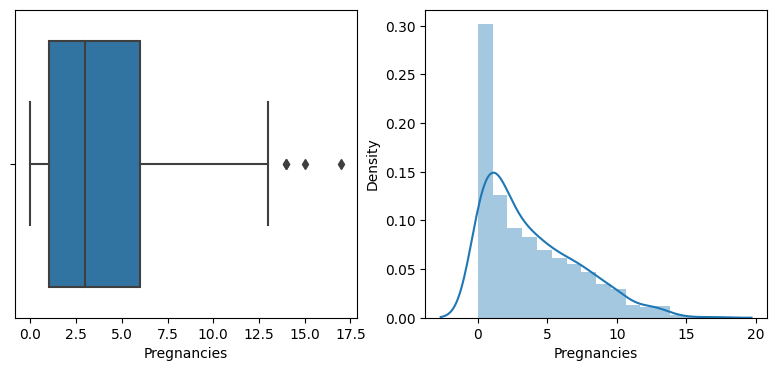

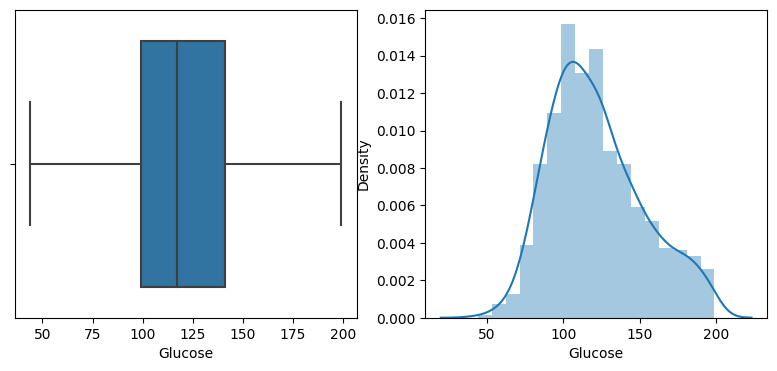

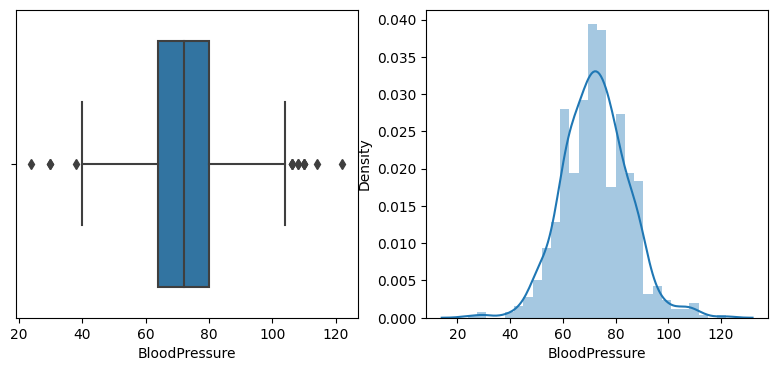

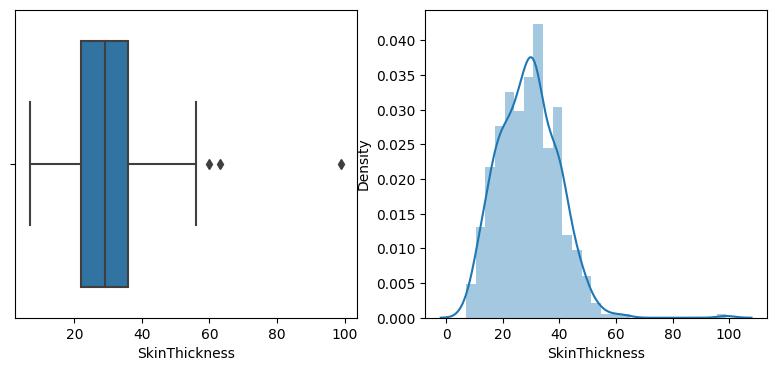

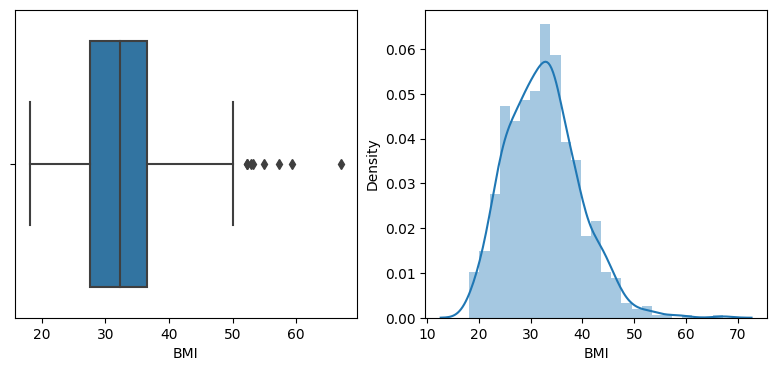

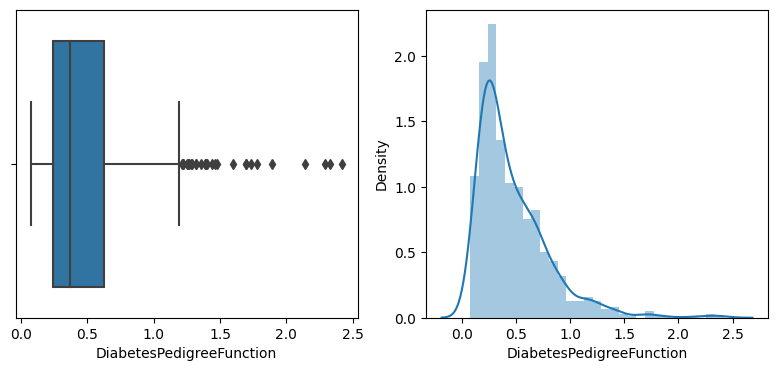

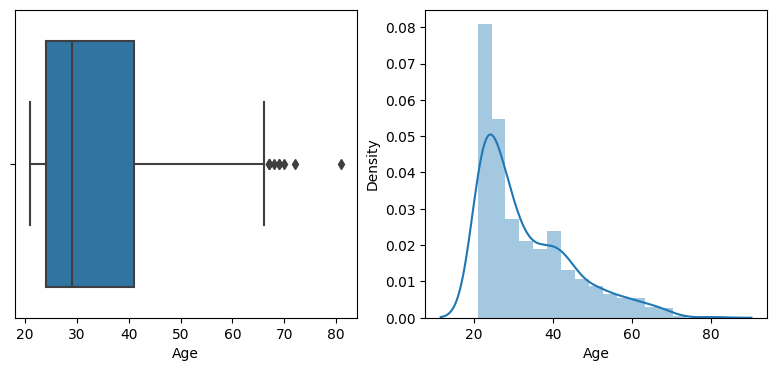

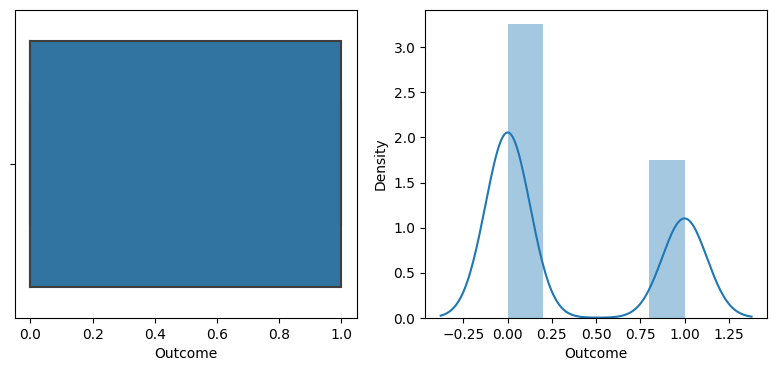

In [139]:
dist_plot(df)

C:\Users\mamit\AppData\Local\Temp\ipykernel_11980\937455760.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_plot[feature])
C:\Users\mamit\AppData\Local\Temp\ipykernel_11980\937455760.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_plot[feature])
C:\Users\mamit\AppData\Local\Temp\ip

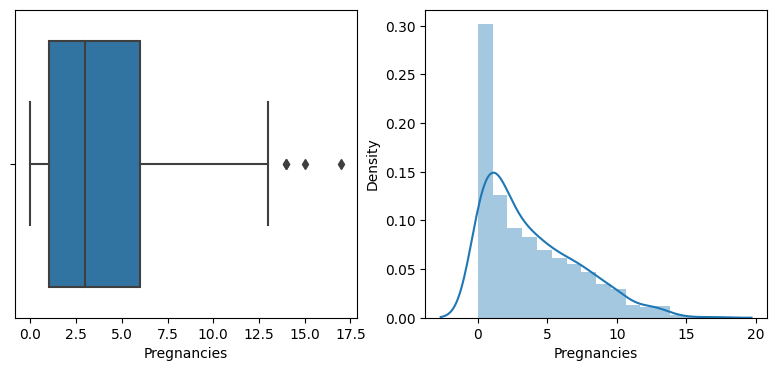

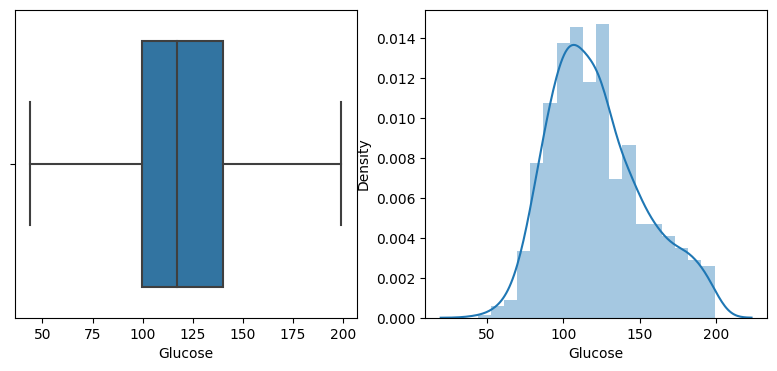

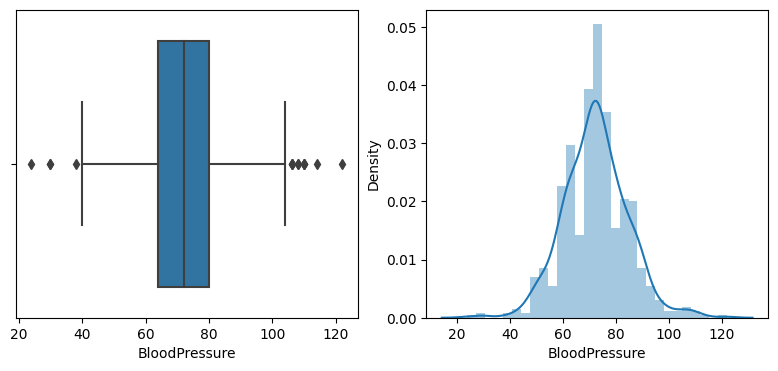

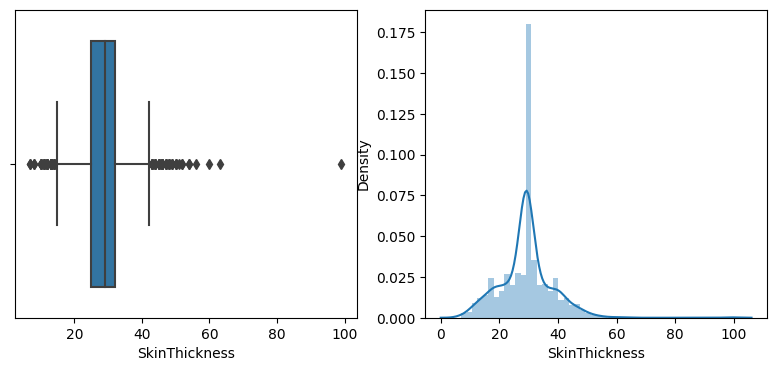

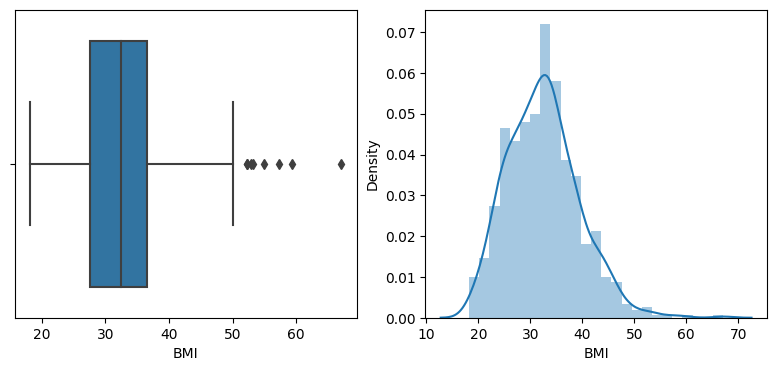

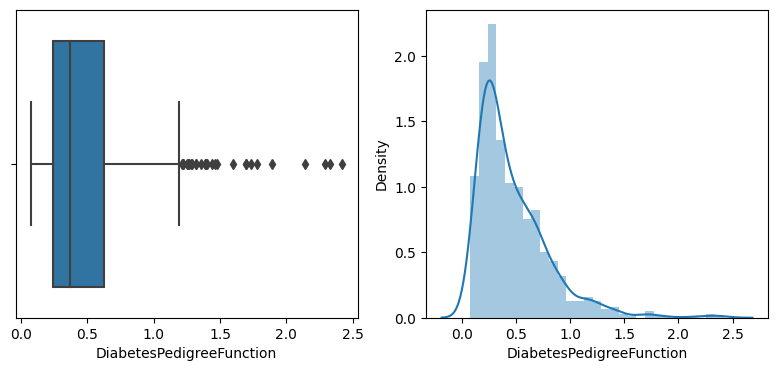

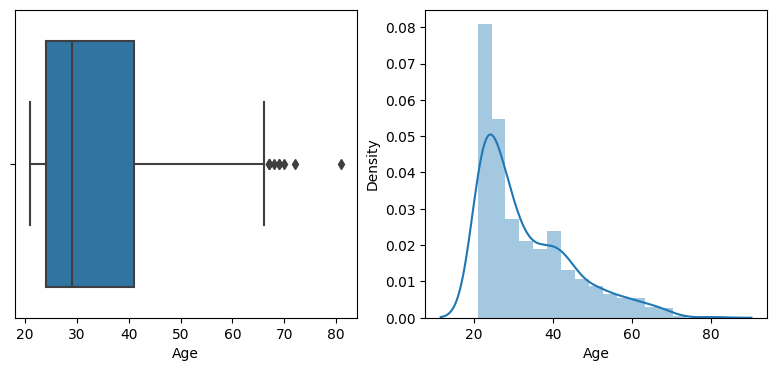

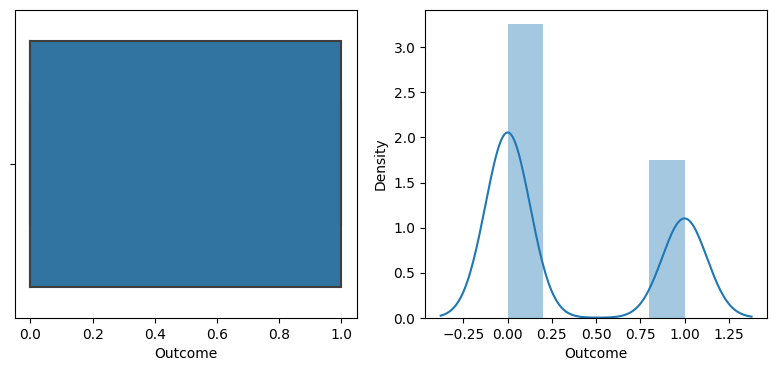

In [140]:
dist_plot(df_2)

Before: (768, 8), After: (627, 8)


C:\Users\mamit\AppData\Local\Temp\ipykernel_11980\937455760.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_plot[feature])
C:\Users\mamit\AppData\Local\Temp\ipykernel_11980\937455760.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_plot[feature])
C:\Users\mamit\AppData\Local\Temp\ip

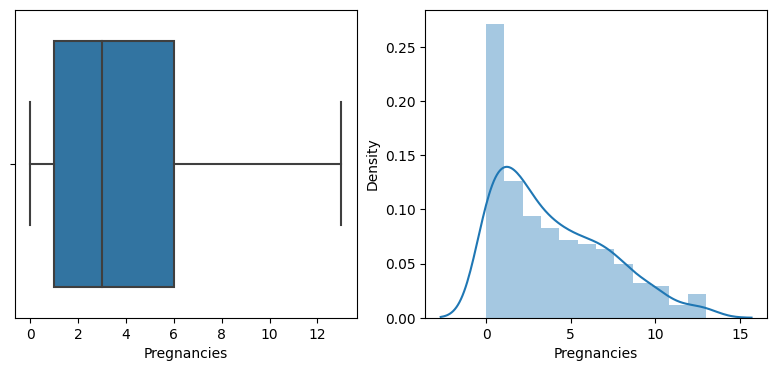

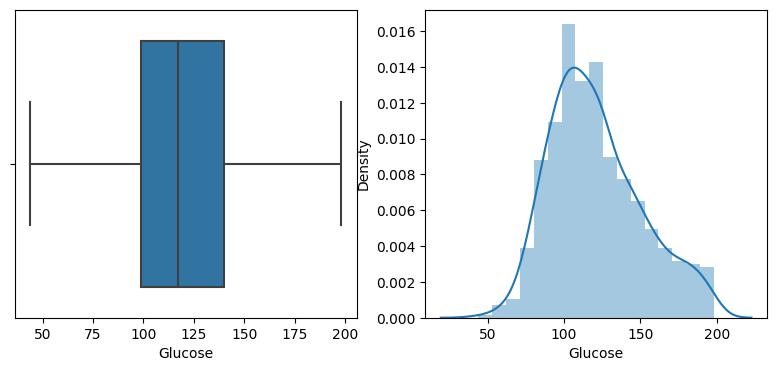

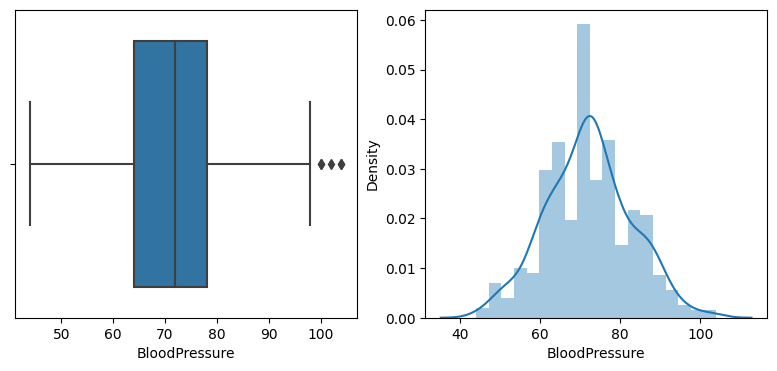

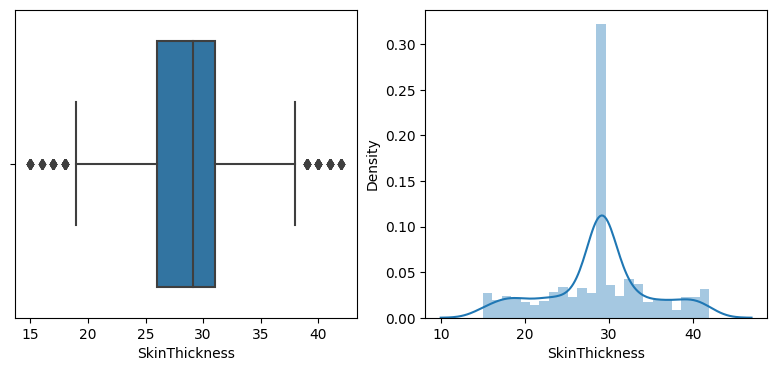

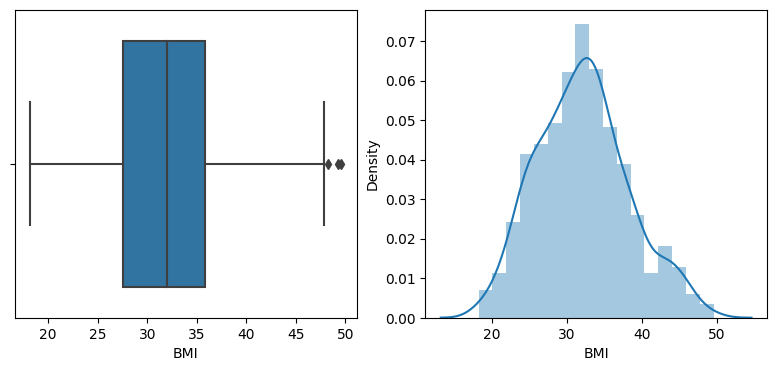

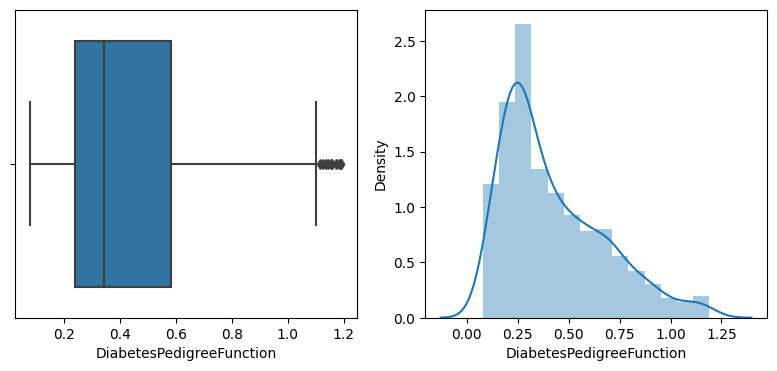

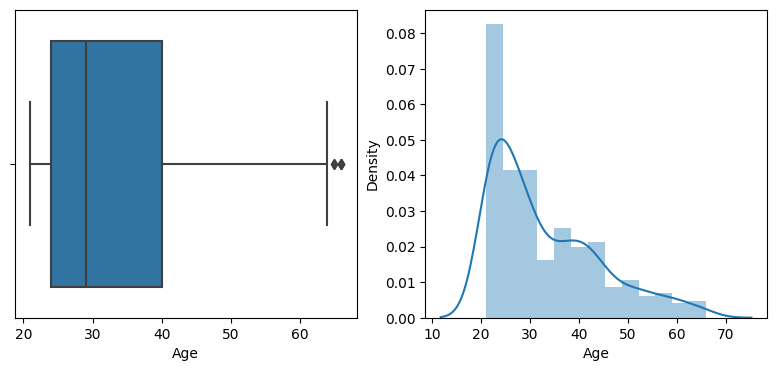

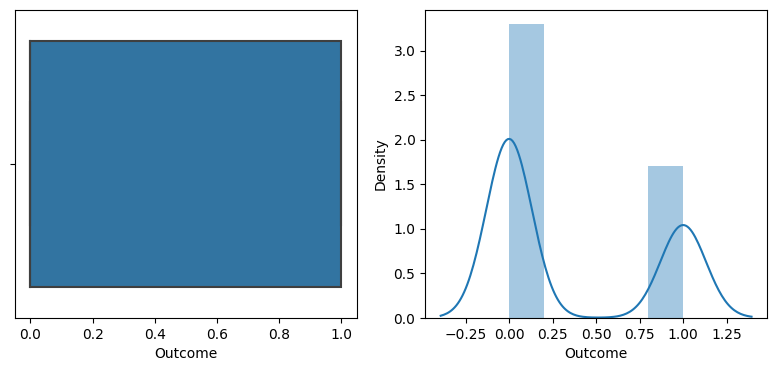

In [141]:
df_2_out = remove_outliers(df_2)
dist_plot(df_2_out)

Before the outliers remove the number of rows is 768 and After remove outliers the number of row is 627.

### Modeling

#### Split the data

In [142]:
X = df_2_out[df_2_out.columns[:-1]]
y = df_2_out['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

#### Normalize the data

In [143]:
norm = StandardScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

## Model Evaluation

## Naïve Bayes Classifier

In [145]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_norm, y_train)
y_pred = gnb.predict(X_test_norm)
accuracy_score(y_test,y_pred)

0.753968253968254

In [146]:
# accuracy_score, recall_score, precision_score, confusion_matrix, f1_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.753968253968254
Recall: 0.6046511627906976
Precision: 0.65
Confusion Matrix:
 [[69 14]
 [17 26]]
F1 Score: 0.6265060240963854
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.82        83
           1       0.65      0.60      0.63        43

    accuracy                           0.75       126
   macro avg       0.73      0.72      0.72       126
weighted avg       0.75      0.75      0.75       126



### 1. Decision Tree

In [190]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_norm,y_train)
y_pred = dt.predict(X_test_norm)
accuracy_score(y_test,y_pred)

0.7063492063492064

In [191]:
# accuracy_score, recall_score, precision_score, confusion_matrix, f1_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.7063492063492064
Recall: 0.6046511627906976
Precision: 0.5652173913043478
Confusion Matrix:
 [[63 20]
 [17 26]]
F1 Score: 0.5842696629213482
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.77        83
           1       0.57      0.60      0.58        43

    accuracy                           0.71       126
   macro avg       0.68      0.68      0.68       126
weighted avg       0.71      0.71      0.71       126



### 2. Random Forest

In [192]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_norm,y_train)
y_pred = rf.predict(X_test_norm)
accuracy_score(y_test,y_pred)

0.753968253968254

In [193]:
# accuracy_score, recall_score, precision_score, confusion_matrix, f1_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.753968253968254
Recall: 0.5581395348837209
Precision: 0.6666666666666666
Confusion Matrix:
 [[71 12]
 [19 24]]
F1 Score: 0.6075949367088608
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.82        83
           1       0.67      0.56      0.61        43

    accuracy                           0.75       126
   macro avg       0.73      0.71      0.71       126
weighted avg       0.75      0.75      0.75       126



### 3. XGBoost

In [194]:
xgb = XGBClassifier()
xgb.fit(X_train_norm, y_train)
y_pred = xgb.predict(X_test_norm)
accuracy_score(y_test, y_pred)

0.7777777777777778

In [195]:
# accuracy_score, recall_score, precision_score, confusion_matrix, f1_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.7777777777777778
Recall: 0.6744186046511628
Precision: 0.6744186046511628
Confusion Matrix:
 [[69 14]
 [14 29]]
F1 Score: 0.6744186046511628
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        83
           1       0.67      0.67      0.67        43

    accuracy                           0.78       126
   macro avg       0.75      0.75      0.75       126
weighted avg       0.78      0.78      0.78       126



**Here we can see the accuracy of XGBoost is more 77.77%, so here XGBoost is best perform.**

## 3. Multivariate Imputation 

For this Multivariate Imputation technique we use KNNImputer that can fill the null values.

In [147]:
df.shape

(768, 8)

In [148]:
df.isnull().mean()*100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

To remove null values first we import the KNNImputer module using `from sklearn.impute import KNNImputer` code.

In [149]:
df_3 = df.copy()

To use KNN Imputer First we need to import KNNImputer

### Advantages of K-Nearest Neighbors (KNN) Imputation:

**Flexibility:** KNN imputation is versatile and can handle various data types (numeric, categorical) and complex data relationships.

**Preservation of Data Size:** Retains the original number of rows, avoiding data loss.

**Customization:** Allows for customization by considering a specified number (K) of nearest neighbors for imputation, making it adaptable to different scenarios.

**Non-parametric:** Doesn't assume specific data distributions, making it suitable for a wide range of datasets.

**Robustness to Outliers:** Can handle outliers gracefully by considering multiple neighboring data points.

### Disadvantages of K-Nearest Neighbors (KNN) Imputation:

**Computational Intensity:** KNN imputation can be computationally expensive, especially for large datasets or high values of K.

**Sensitivity to K:** The choice of K can significantly impact imputation results. An inappropriate K value may lead to biased imputations.

**Scaling Sensitivity:** KNN is sensitive to the scale of features, requiring feature scaling to prevent one variable from dominating the distance calculations.

**High-Dimensional Data:** Performance may degrade in high-dimensional spaces, known as the "curse of dimensionality."

**Need for Sufficient Data:** Requires a sufficient number of neighbors with complete data for accurate imputations.

In [150]:
#Remove the outliers
df_3_out = remove_outliers(df_3)

Before: (768, 8), After: (705, 8)


In [151]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df_3_out_null = imputer.fit_transform(df_3_out)

In [152]:
df_3_out_null = pd.DataFrame(df_3_out_null)
df_3_out_null.isnull().sum().sum()

0

In [153]:
df_3_out_null.sample(10)

0      1     2     3     4      5     6    7
668   8.0  120.0  86.0  27.0  28.4  0.259  22.0  1.0
23    7.0  147.0  76.0  36.5  39.4  0.257  43.0  1.0
366   9.0   72.0  78.0  25.0  31.6  0.280  38.0  0.0
449   2.0   89.0  90.0  30.0  33.5  0.292  42.0  0.0
298   2.0  102.0  86.0  36.0  45.5  0.127  23.0  1.0
397   1.0   90.0  68.0   8.0  24.5  1.138  36.0  0.0
257   7.0  161.0  86.0  35.5  30.4  0.165  47.0  1.0
353   3.0  100.0  68.0  23.0  31.6  0.949  28.0  0.0
649  10.0  129.0  62.0  36.0  41.2  0.441  38.0  1.0
222  10.0  122.0  68.0  35.0  31.2  0.258  41.0  0.0

In [154]:
X = df_3_out_null[df_3_out_null.columns[:-1]]
y = df_3_out_null[df_3_out_null.columns[-1]]

In [155]:
X.head()

0      1     2     3     4      5     6
0  6.0  148.0  72.0  35.0  33.6  0.627  50.0
1  1.0   85.0  66.0  29.0  26.6  0.351  31.0
2  8.0  183.0  64.0  24.0  23.3  0.672  32.0
3  1.0   89.0  66.0  23.0  28.1  0.167  21.0
4  5.0  116.0  74.0  20.0  25.6  0.201  30.0

In [156]:
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: 7, dtype: float64

### Split the data

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

### Normalize the data

In [158]:
norm = StandardScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

## Model Evaluation

## Naïve Bayes Classifier

In [160]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_norm, y_train)
y_pred = gnb.predict(X_test_norm)
accuracy_score(y_test,y_pred)

0.7588652482269503

In [161]:
# accuracy_score, recall_score, precision_score, confusion_matrix, f1_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.7588652482269503
Recall: 0.6382978723404256
Precision: 0.6382978723404256
Confusion Matrix:
 [[77 17]
 [17 30]]
F1 Score: 0.6382978723404256
Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.82      0.82        94
         1.0       0.64      0.64      0.64        47

    accuracy                           0.76       141
   macro avg       0.73      0.73      0.73       141
weighted avg       0.76      0.76      0.76       141



### 1. Decision Tree

In [208]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_norm,y_train)
y_pred = dt.predict(X_test_norm)
accuracy_score(y_test,y_pred)

0.7588652482269503

In [209]:
# accuracy_score, recall_score, precision_score, confusion_matrix, f1_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.7588652482269503
Recall: 0.6170212765957447
Precision: 0.6444444444444445
Confusion Matrix:
 [[78 16]
 [18 29]]
F1 Score: 0.6304347826086957
Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.83      0.82        94
         1.0       0.64      0.62      0.63        47

    accuracy                           0.76       141
   macro avg       0.73      0.72      0.73       141
weighted avg       0.76      0.76      0.76       141



### 2. Random Forest

In [210]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_norm,y_train)
y_pred = rf.predict(X_test_norm)
accuracy_score(y_test,y_pred)

0.7801418439716312

In [211]:
# accuracy_score, recall_score, precision_score, confusion_matrix, f1_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.7801418439716312
Recall: 0.574468085106383
Precision: 0.7105263157894737
Confusion Matrix:
 [[83 11]
 [20 27]]
F1 Score: 0.6352941176470589
Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.88      0.84        94
         1.0       0.71      0.57      0.64        47

    accuracy                           0.78       141
   macro avg       0.76      0.73      0.74       141
weighted avg       0.77      0.78      0.77       141



### 3. XGBoost

In [212]:
xgb = XGBClassifier()
xgb.fit(X_train_norm, y_train)
y_pred = xgb.predict(X_test_norm)
accuracy_score(y_test, y_pred)

0.8085106382978723

In [213]:
# accuracy_score, recall_score, precision_score, confusion_matrix, f1_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.8085106382978723
Recall: 0.723404255319149
Precision: 0.7083333333333334
Confusion Matrix:
 [[80 14]
 [13 34]]
F1 Score: 0.7157894736842105
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.85      0.86        94
         1.0       0.71      0.72      0.72        47

    accuracy                           0.81       141
   macro avg       0.78      0.79      0.79       141
weighted avg       0.81      0.81      0.81       141



**Here we can see the accuracy of Random Forest Model is more 78%, so here Random Forest Model is best perform.**

### **Till Now We see that Removes rows with Random Forest gives us the best accurecy score.**

# Features Engineering 

In `df_1_out` dataset we perform the Remove null rows for Data cleaning the we have used the **Random Forest** algorithm and this give the best result. So now we will use `df_1_out` dataset to check whether the feature engineering gives the best, same, or worse result

In [214]:
df_1_out.isnull().sum().sum()

0

In [215]:
df_1_out.shape

(476, 8)

In [216]:
df_1_out.sample(5)

Pregnancies  Glucose  BloodPressure  SkinThickness   BMI  \
315            2    112.0           68.0           22.0  34.1   
296            2    146.0           70.0           38.0  28.0   
717           10     94.0           72.0           18.0  23.1   
258            1    193.0           50.0           16.0  25.9   
59             0    105.0           64.0           41.0  41.5   

     DiabetesPedigreeFunction  Age  Outcome  
315                     0.315   26        0  
296                     0.337   29        1  
717                     0.595   56        0  
258                     0.655   24        0  
59                      0.173   22        0

In [217]:
features = df_1_out.drop(columns=['Outcome'])
features.head()

Pregnancies  Glucose  BloodPressure  SkinThickness   BMI  \
0            6    148.0           72.0           35.0  33.6   
1            1     85.0           66.0           29.0  26.6   
3            1     89.0           66.0           23.0  28.1   
6            3     78.0           50.0           32.0  31.0   
8            2    197.0           70.0           45.0  30.5   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
3                     0.167   21  
6                     0.248   26  
8                     0.158   53

In [218]:
label = df_1_out['Outcome']
label.head()

0    1
1    0
3    0
6    1
8    1
Name: Outcome, dtype: int64

Now we have one `features` dataset where all the input column is present and second `label` dataset where the output column is present.

Now we will analysis which feature is more important to predict the output in the dataset and then the plot a graph to see the features important.

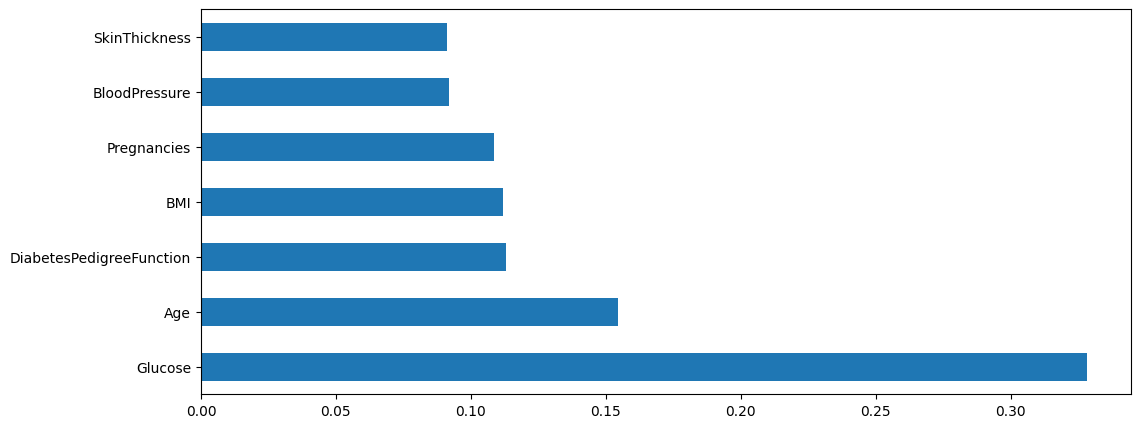

In [219]:
plt.figure(figsize=(12,5))
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(features, label)
feature_importance = pd.Series(etr.feature_importances_, index=features.columns)
feature_importance.nlargest(20).plot(kind='barh')
plt.show()

In [220]:
features_important_index = list(feature_importance.sort_values(ascending=False).index)
features_important_index

['Glucose',
 'Age',
 'DiabetesPedigreeFunction',
 'BMI',
 'Pregnancies',
 'BloodPressure',
 'SkinThickness']

In [222]:
from sklearn.model_selection import train_test_split
import warnings
from sklearn.exceptions import DataConversionWarning
from sklearn.ensemble import RandomForestClassifier

warnings.filterwarnings("ignore", category=DataConversionWarning)

X_features = []
y_features = ['Outcome']
for i,feat in enumerate(features_important_index):
    X_features.append(feat)
    X = df_1_out.loc[:,X_features]
    y = df_1_out.loc[:,y_features]
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
    
    norm = StandardScaler().fit(X_train)
    X_train_norm = norm.transform(X_train)
    X_test_norm = norm.transform(X_test)
    
    rf = RandomForestClassifier()
    rf.fit(X_train_norm, y_train)
    y_pred = rf.predict(X_test_norm)
    acc_score = accuracy_score(y_test, y_pred)
    
    print(f"The Accuracy score is {acc_score*100} using {i+1} features that are {X_features}")

The Accuracy score is 78.15126050420169 using 1 features that are ['Glucose']
The Accuracy score is 79.83193277310924 using 2 features that are ['Glucose', 'Age']
The Accuracy score is 73.94957983193278 using 3 features that are ['Glucose', 'Age', 'DiabetesPedigreeFunction']
The Accuracy score is 79.83193277310924 using 4 features that are ['Glucose', 'Age', 'DiabetesPedigreeFunction', 'BMI']
The Accuracy score is 79.83193277310924 using 5 features that are ['Glucose', 'Age', 'DiabetesPedigreeFunction', 'BMI', 'Pregnancies']
The Accuracy score is 78.99159663865547 using 6 features that are ['Glucose', 'Age', 'DiabetesPedigreeFunction', 'BMI', 'Pregnancies', 'BloodPressure']
The Accuracy score is 75.63025210084034 using 7 features that are ['Glucose', 'Age', 'DiabetesPedigreeFunction', 'BMI', 'Pregnancies', 'BloodPressure', 'SkinThickness']
